<a href="https://colab.research.google.com/github/ASHTONEONYANGO/Early-Prognosis-of-Cardiovascular-Diseases/blob/master/Early_Prognosis_of_Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Heart Disease Prediction
The early prognosis of Cardiovascular Diseases can aid in making decisions on lifestyle changes in high risk patients, and in turn go a long way into reducing complications and saving lives.

This project intends to pinpoint and analyse the most relevant/risk factors of heart diseases as well as predict the overall risk using logistic regression and other allied ML technique.

In [104]:
# importing libraries
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
matplotlib.style.use('ggplot')

### Data Preparation
**Source:**
The dataset is publicly available on the kaggle website, and was collected from hospitals from an ongoing study on the residents of the town of Framingham. 
The intention is to replicate the analysis from this data for high risk patients in regions across the sub-Sahara.

- https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

The classification goal is to predict whether a patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. 

In [105]:
heart_df = pd.read_csv('/content/drive/My Drive/Ashtone Onyango/Colab Notebooks/Framingham.csv')
# dropping the attribute education - not much sense as a risk factor. 
# heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]

**Renaming of columns**
- Some columns which are in complex medical terms are renamed for easy understanding by medical and non-medical persons alike.
eg. 'systolic_Blood_Pressure' is renamed to simply 'Blood_Pressure'

In [106]:
# renaming of columns for ease of understanding
heart_df.rename(columns={'male':'Gender'},inplace=True)
heart_df.rename(columns={'BPMeds':'Blood_Pressure_Medication'},inplace=True)
heart_df.rename(columns={'prevalentStroke':'stroke'},inplace=True)
heart_df.rename(columns={'prevalentHyp':'hypertension'},inplace=True)
heart_df.rename(columns={'totChol':'cholesterol'},inplace=True)
heart_df.rename(columns={'sysBP':'systolic_Blood_Pressure'},inplace=True)
heart_df.rename(columns={'diaBP':'diastolic_Blood_Pressure'},inplace=True)
#heart_df.rename(columns={'male':'Sex_male'},inplace=True)

heart_df.head()

Gender  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0       1   39        4.0              0  ...  26.97       80.0     77.0           0
1       0   46        2.0              0  ...  28.73       95.0     76.0           0
2       1   48        1.0              1  ...  25.34       75.0     70.0           0
3       0   61        3.0              1  ...  28.58       65.0    103.0           1
4       0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]

### Variables:

Each attribute is a potential risk factor. There are both demographic, behaviourial and medical risk factors.

- Demographic

 - Gender: male - 1 or female - 0;(Nominal)

 - age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


- Behavioural

 - currentSmoker: whether or not the patient is a current smoker (Nominal)

 - cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarrettes, even half a cigarette.)


- Medical Risk Factors
   
- Medical(history)

 - Blood_Pressure_Medication: whether or not the patient was on blood pressure medication (Nominal)

 - stroke: whether or not the patient had previously had a stroke (Nominal)

 - Hypertension: whether or not the patient was hypertensive (Nominal)

 - diabetes: whether or not the patient had diabetes (Nominal)


- Medical(current):

 - cholesterol: total cholesterol level (Continuous)

 - systolic_Blood_Pressure: systolic blood pressure (Continuous)

 - diastolic_Blood_Pressure: diastolic blood pressure (Continuous)

 - BMI: Body Mass Index (Continuous)

 - heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

 - glucose: glucose level (Continuous)


- Predict variable (desired target):

 - 10 year risk of coronary heart disease TenYearCHD (binary: “1”, means “Yes”, “0” means “No”)

In [107]:
heart_df

Gender  age  education  ...  heartRate  glucose  TenYearCHD
0          1   39        4.0  ...       80.0     77.0           0
1          0   46        2.0  ...       95.0     76.0           0
2          1   48        1.0  ...       75.0     70.0           0
3          0   61        3.0  ...       65.0    103.0           1
4          0   46        3.0  ...       85.0     85.0           0
...      ...  ...        ...  ...        ...      ...         ...
4233       1   50        1.0  ...       66.0     86.0           1
4234       1   51        3.0  ...       65.0     68.0           0
4235       0   48        2.0  ...       84.0     86.0           0
4236       0   44        1.0  ...       86.0      NaN           0
4237       0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]

### Missing Values
- The biggest deal breakers in in data is "missing data".

In [ ]:
count = 0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print()
print('since it is only ', round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582

since it is only  14 percent of the entire dataset the rows with missing values are excluded.


The code above parses the data to determine the total number of null entries row-wise, and their percentage.

Getting the sum of all null entries for every column in the data .

In [ ]:
# identifying missing values
heart_df.isnull().sum()

Gender                         0
age                            0
education                    105
currentSmoker                  0
cigsPerDay                    29
Blood_Pressure_Medication     53
stroke                         0
hypertension                   0
diabetes                       0
cholesterol                   50
systolic_Blood_Pressure        0
diastolic_Blood_Pressure       0
BMI                           19
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

Visualising the missing data.

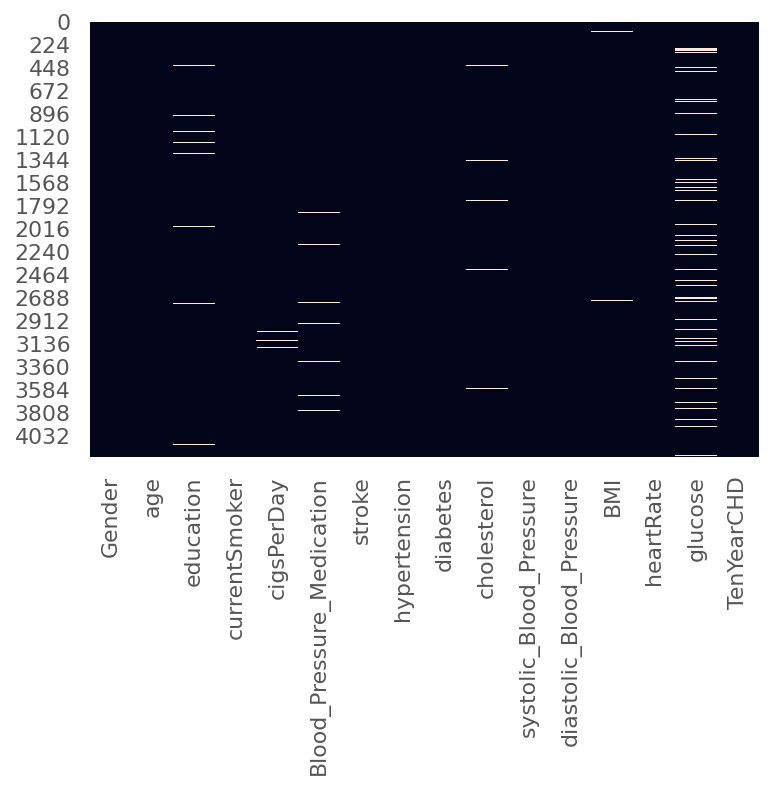

In [ ]:
# visualization off the missing values
sb.heatmap(heart_df.isnull(),cbar=False)

**Handling missing data**
#### Missing Data Imputation
- Imputing the missing data with mean.

This replaces all the null entries with the mean of the particular column

In [108]:
heart_df.education.fillna(heart_df.education.mean(),inplace=True)
heart_df.cigsPerDay.fillna(heart_df.cigsPerDay.mean(),inplace=True)
heart_df.Blood_Pressure_Medication.fillna(heart_df.Blood_Pressure_Medication.mean(),inplace=True)
heart_df.cholesterol.fillna(heart_df.cholesterol.mean(),inplace=True)
heart_df.BMI.fillna(heart_df.BMI.mean(),inplace=True)
heart_df.heartRate.fillna(heart_df.heartRate.mean(),inplace=True)
heart_df.glucose.fillna(heart_df.glucose.mean(),inplace=True)

In [109]:

heart_df.isnull().sum()

Gender                       0
age                          0
education                    0
currentSmoker                0
cigsPerDay                   0
Blood_Pressure_Medication    0
stroke                       0
hypertension                 0
diabetes                     0
cholesterol                  0
systolic_Blood_Pressure      0
diastolic_Blood_Pressure     0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

- The visualization below indicates no presence of null entries in the data, all of them having been replaced with the mean values.

This is in contrast to the earlier visualisation of the missing data before imputation.

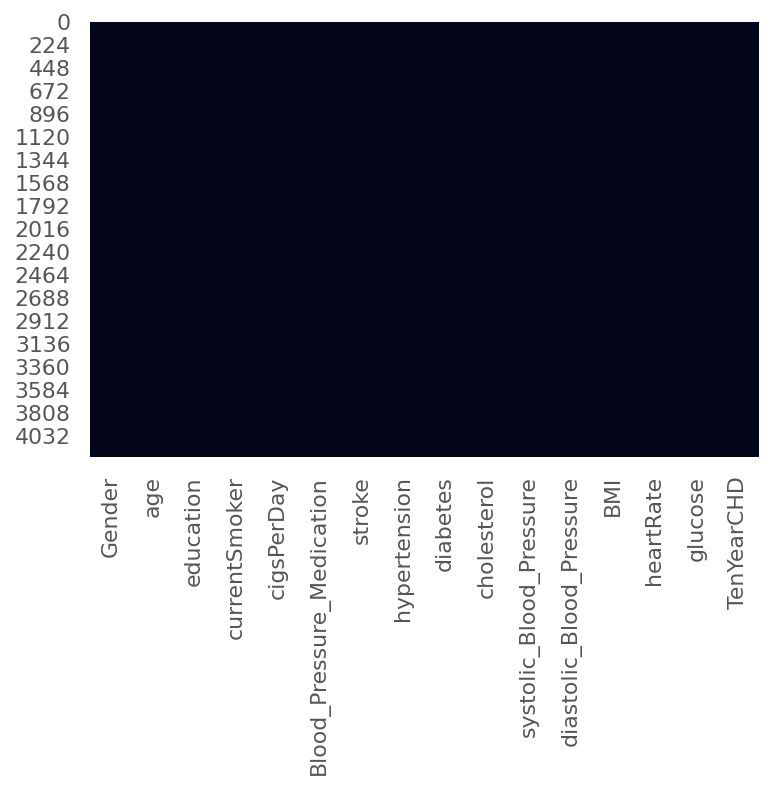

In [110]:
sb.heatmap(heart_df.isnull(),cbar=False)

### Correlation Analysis

 - Checking the correlations between columns by visualizing the correlation matrix as a heatmap ie. correlation matrix plots

In [111]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

Checking how one set of data corresponds to another set of data (columns) in the dataset. 

In [112]:
# correlation analysis
heart_df.corr()

Gender       age  ...   glucose  TenYearCHD
Gender                     1.000000 -0.028979  ...  0.005818    0.088428
age                       -0.028979  1.000000  ...  0.116850    0.225256
education                  0.017126 -0.163613  ... -0.033721   -0.053384
currentSmoker              0.197596 -0.213748  ... -0.054157    0.019456
cigsPerDay                 0.316807 -0.192366  ... -0.056088    0.057775
Blood_Pressure_Medication -0.052204  0.121980  ...  0.048905    0.086774
stroke                    -0.004546  0.057655  ...  0.018055    0.061810
hypertension               0.005313  0.307194  ...  0.082924    0.177603
diabetes                   0.015708  0.101258  ...  0.605705    0.097317
cholesterol               -0.069974  0.260270  ...  0.044583    0.081624
systolic_Blood_Pressure   -0.035989  0.394302  ...  0.134608    0.216429
diastolic_Blood_Pressure   0.057933  0.206104  ...  0.058647    0.145299
BMI                        0.081506  0.135283  ...  0.082109    0.074680
heartRate                 -0.116601 -0.012819  ...  0.089341    0.022898
glucose                    0.005818  0.116850  ...  1.000000    0.120406
TenYearCHD                 0.088428  0.225256  ...  0.120406    1.000000

[16 rows x 16 columns]

#### Analysing the relationships between the independent variables and target variable. 

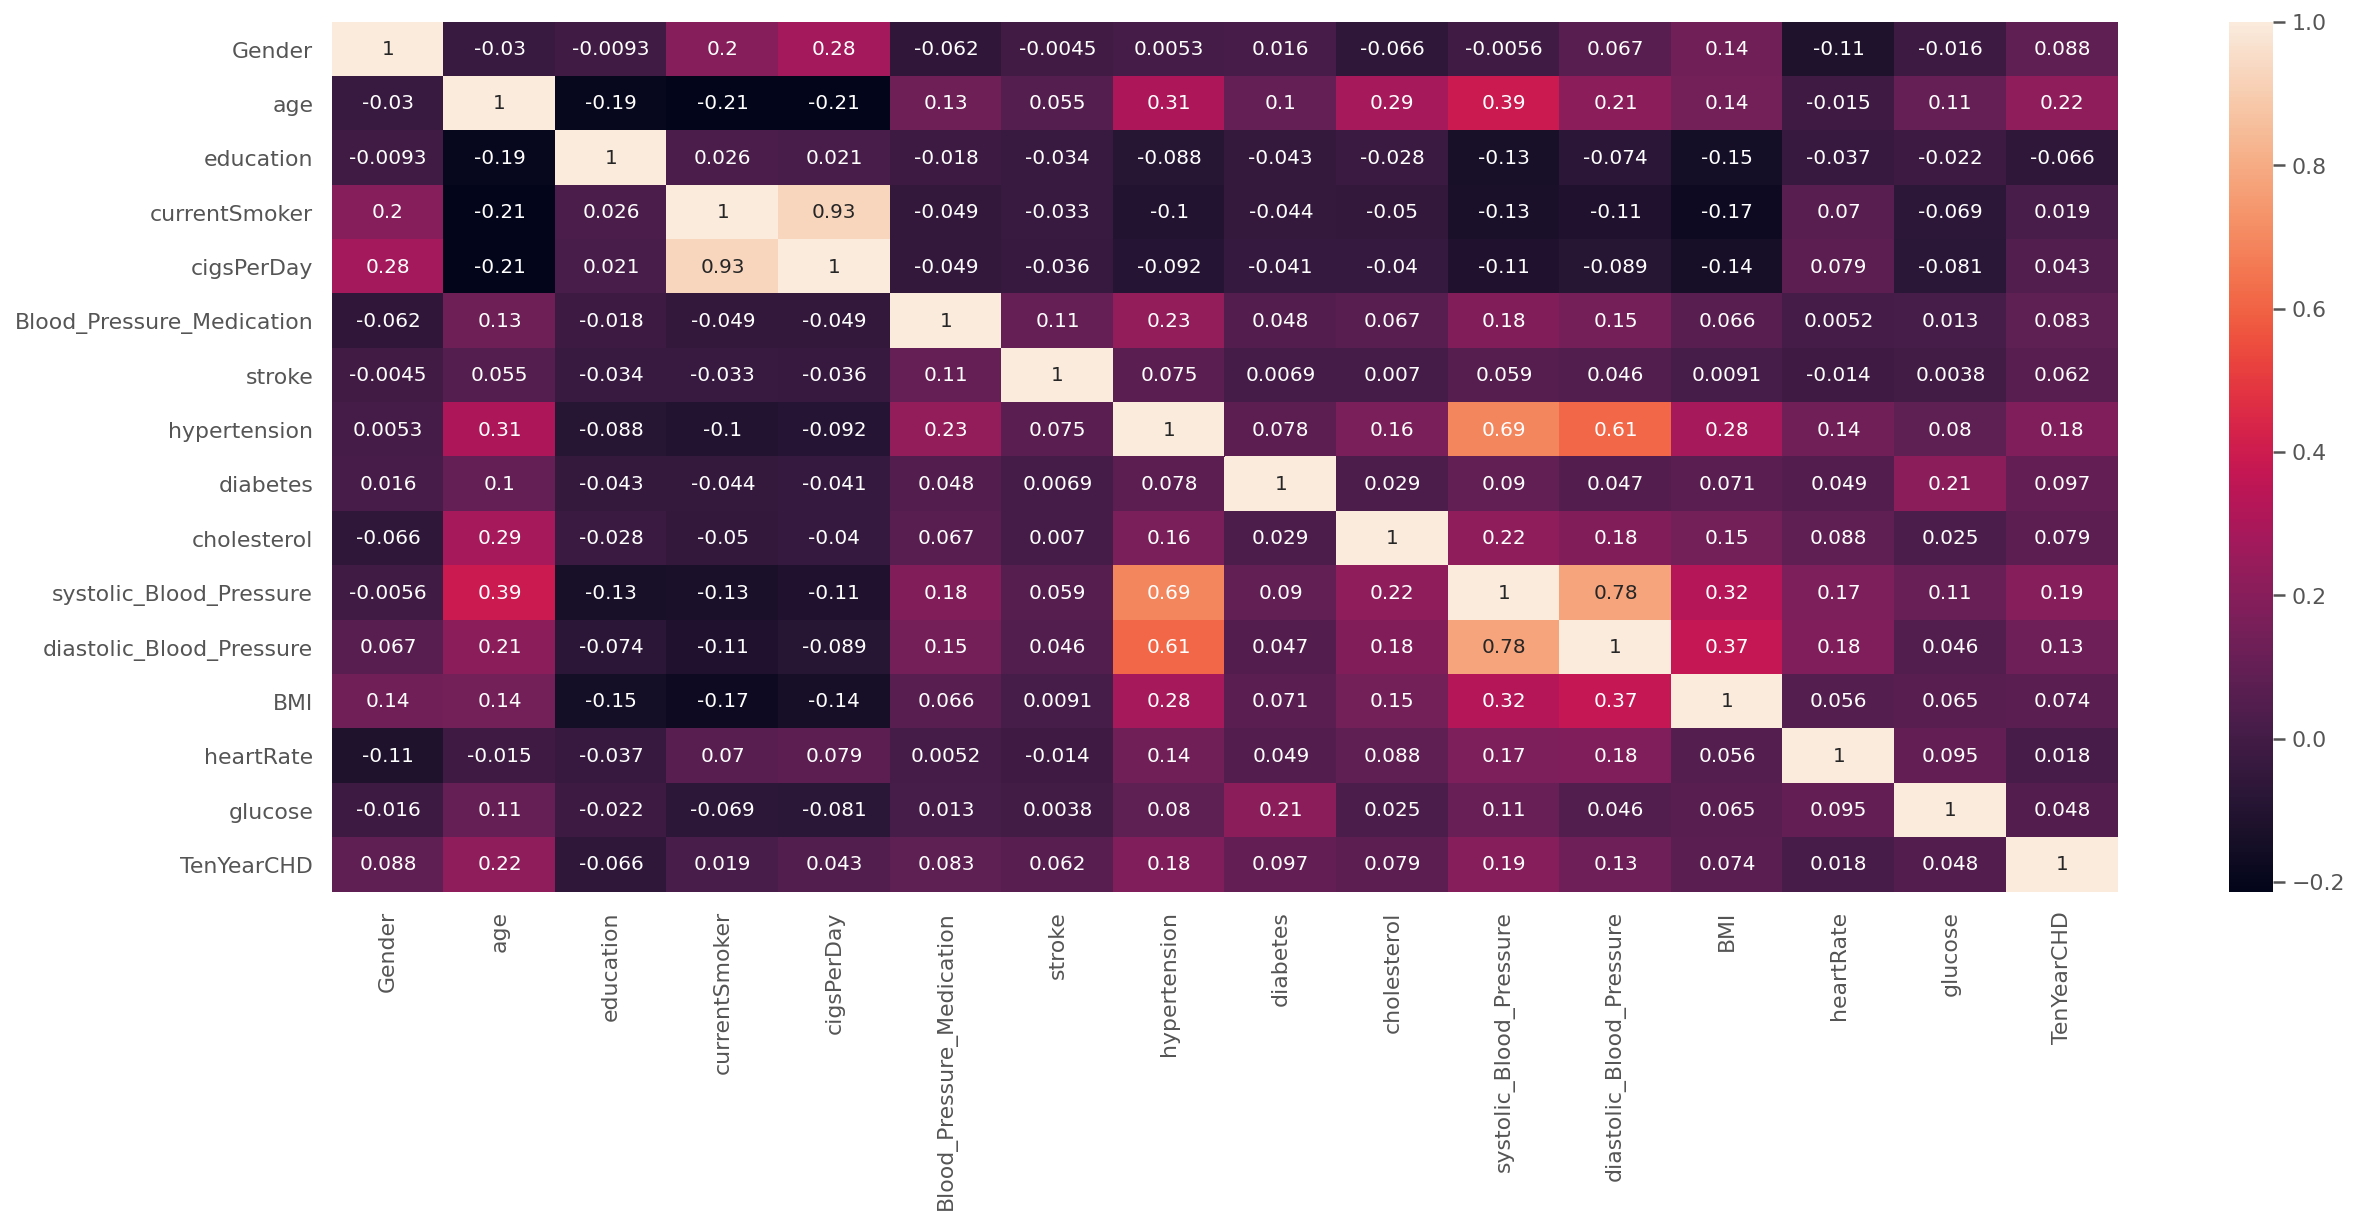

In [ ]:
# matrix plot as correlation of all variables
plt.figure(figsize = (20, 8))
sns.heatmap(heart_df.corr(method='spearman',min_periods=1), annot = True)
plt.show()

# there's a larger correlation magnitude towards the regions with stronger colors,aside from the diagonal

- heatmap showing correlation between variables using different shades of color to indicate the discrepancies.
- the lighter shades indicate stronger correlation while the darker shades show weaker correlation or no correlation at all. 

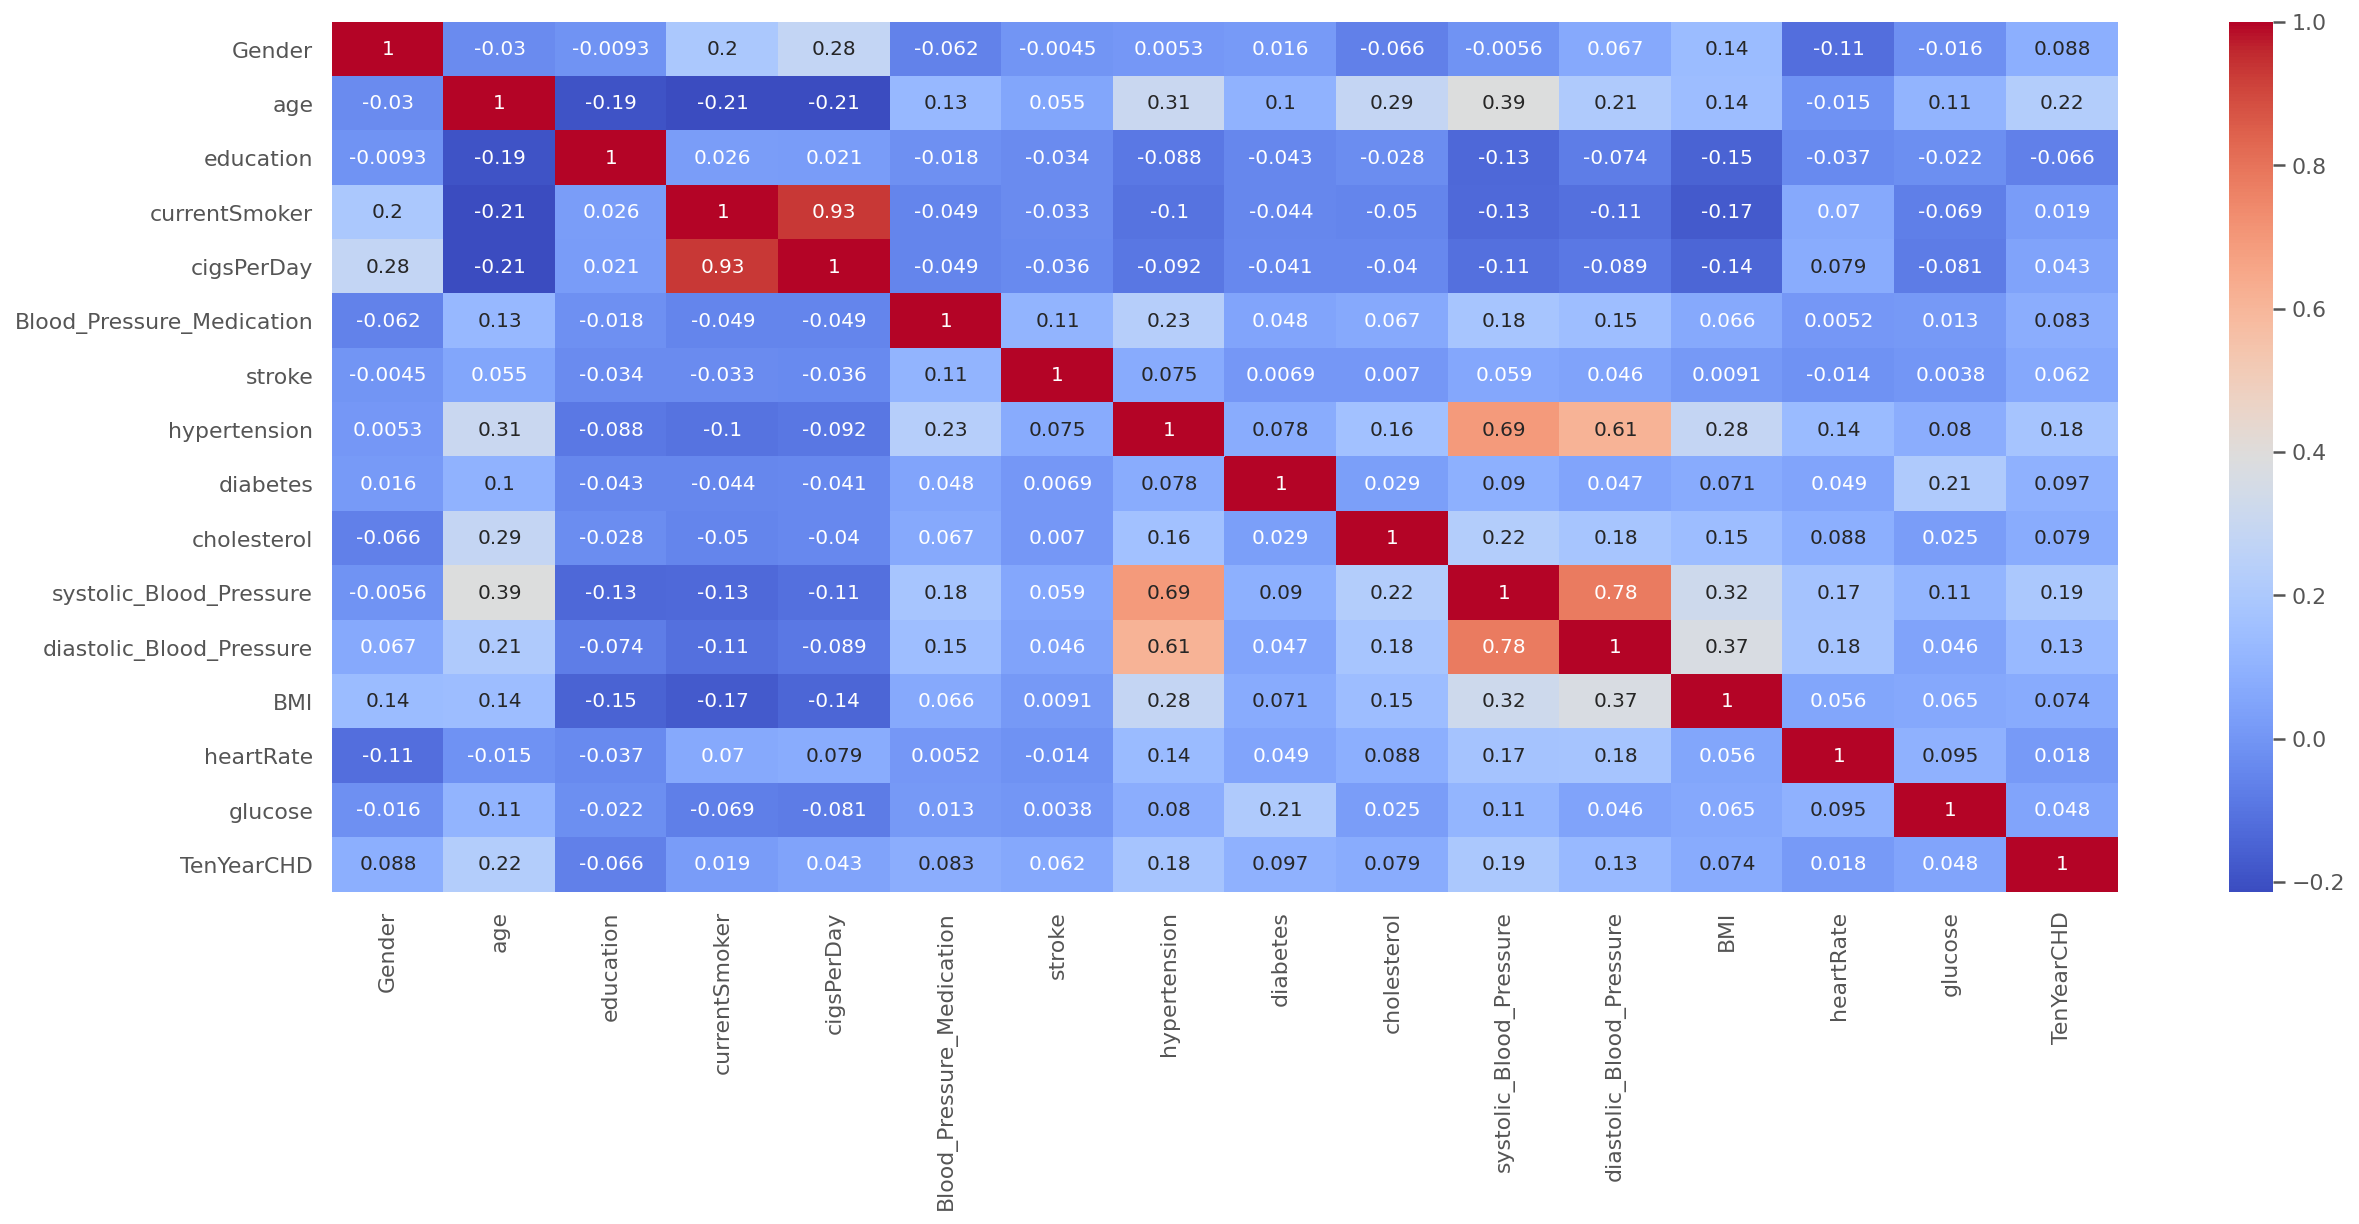

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(heart_df.corr(method='spearman'),cmap='coolwarm',annot=True)

- heatmap showing the correlations between variables using their correlation values.

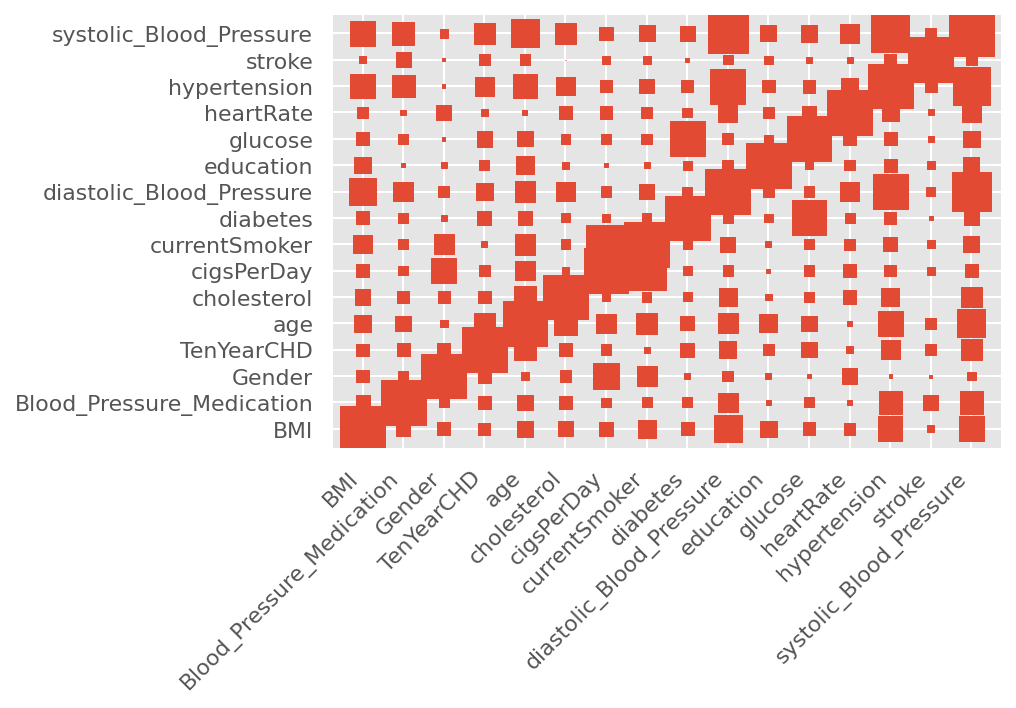

<Figure size 720x432 with 0 Axes>

In [ ]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()

    plt.figure(figsize = (10, 6))
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = heart_df
columns = ['Gender', 'age', 'education', 'currentSmoker','cigsPerDay', 'Blood_Pressure_Medication', 'stroke','hypertension','diabetes','cholesterol','systolic_Blood_Pressure','diastolic_Blood_Pressure','BMI','heartRate','glucose','TenYearCHD'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

From all the above plots:
- the lighter regions/color represent more positive and larger magnitude of correlation between the attributes, whereas the darker shades represent more negative and lower magnitude correlation.
- As such, systolic and diastolic blood pressure are attributed more to the prevalence of stroke and diabetes (they have a higher correlation)
- Likewise, cholesterol, glucose levels and the BMI are attributed to hypertension, diabetes and stroke.
- conversely, Gender, age and education have no significant correlation with any other attributes thus are no major medical risk factors for any health condition.

From these visualisations, it becomes very clear how systolic_Blood_Pressure, diastolic_Blood_Pressure, and hypertension play a big role in determining the occurence of TenYearCHD - coronary heart disease.

### **Exploratory Visualisations**

**Histograms**

Graphical representations of the distribution of variables in a dataset. 

They show the underlying frequency or probability distribution of continuous numerical variables.

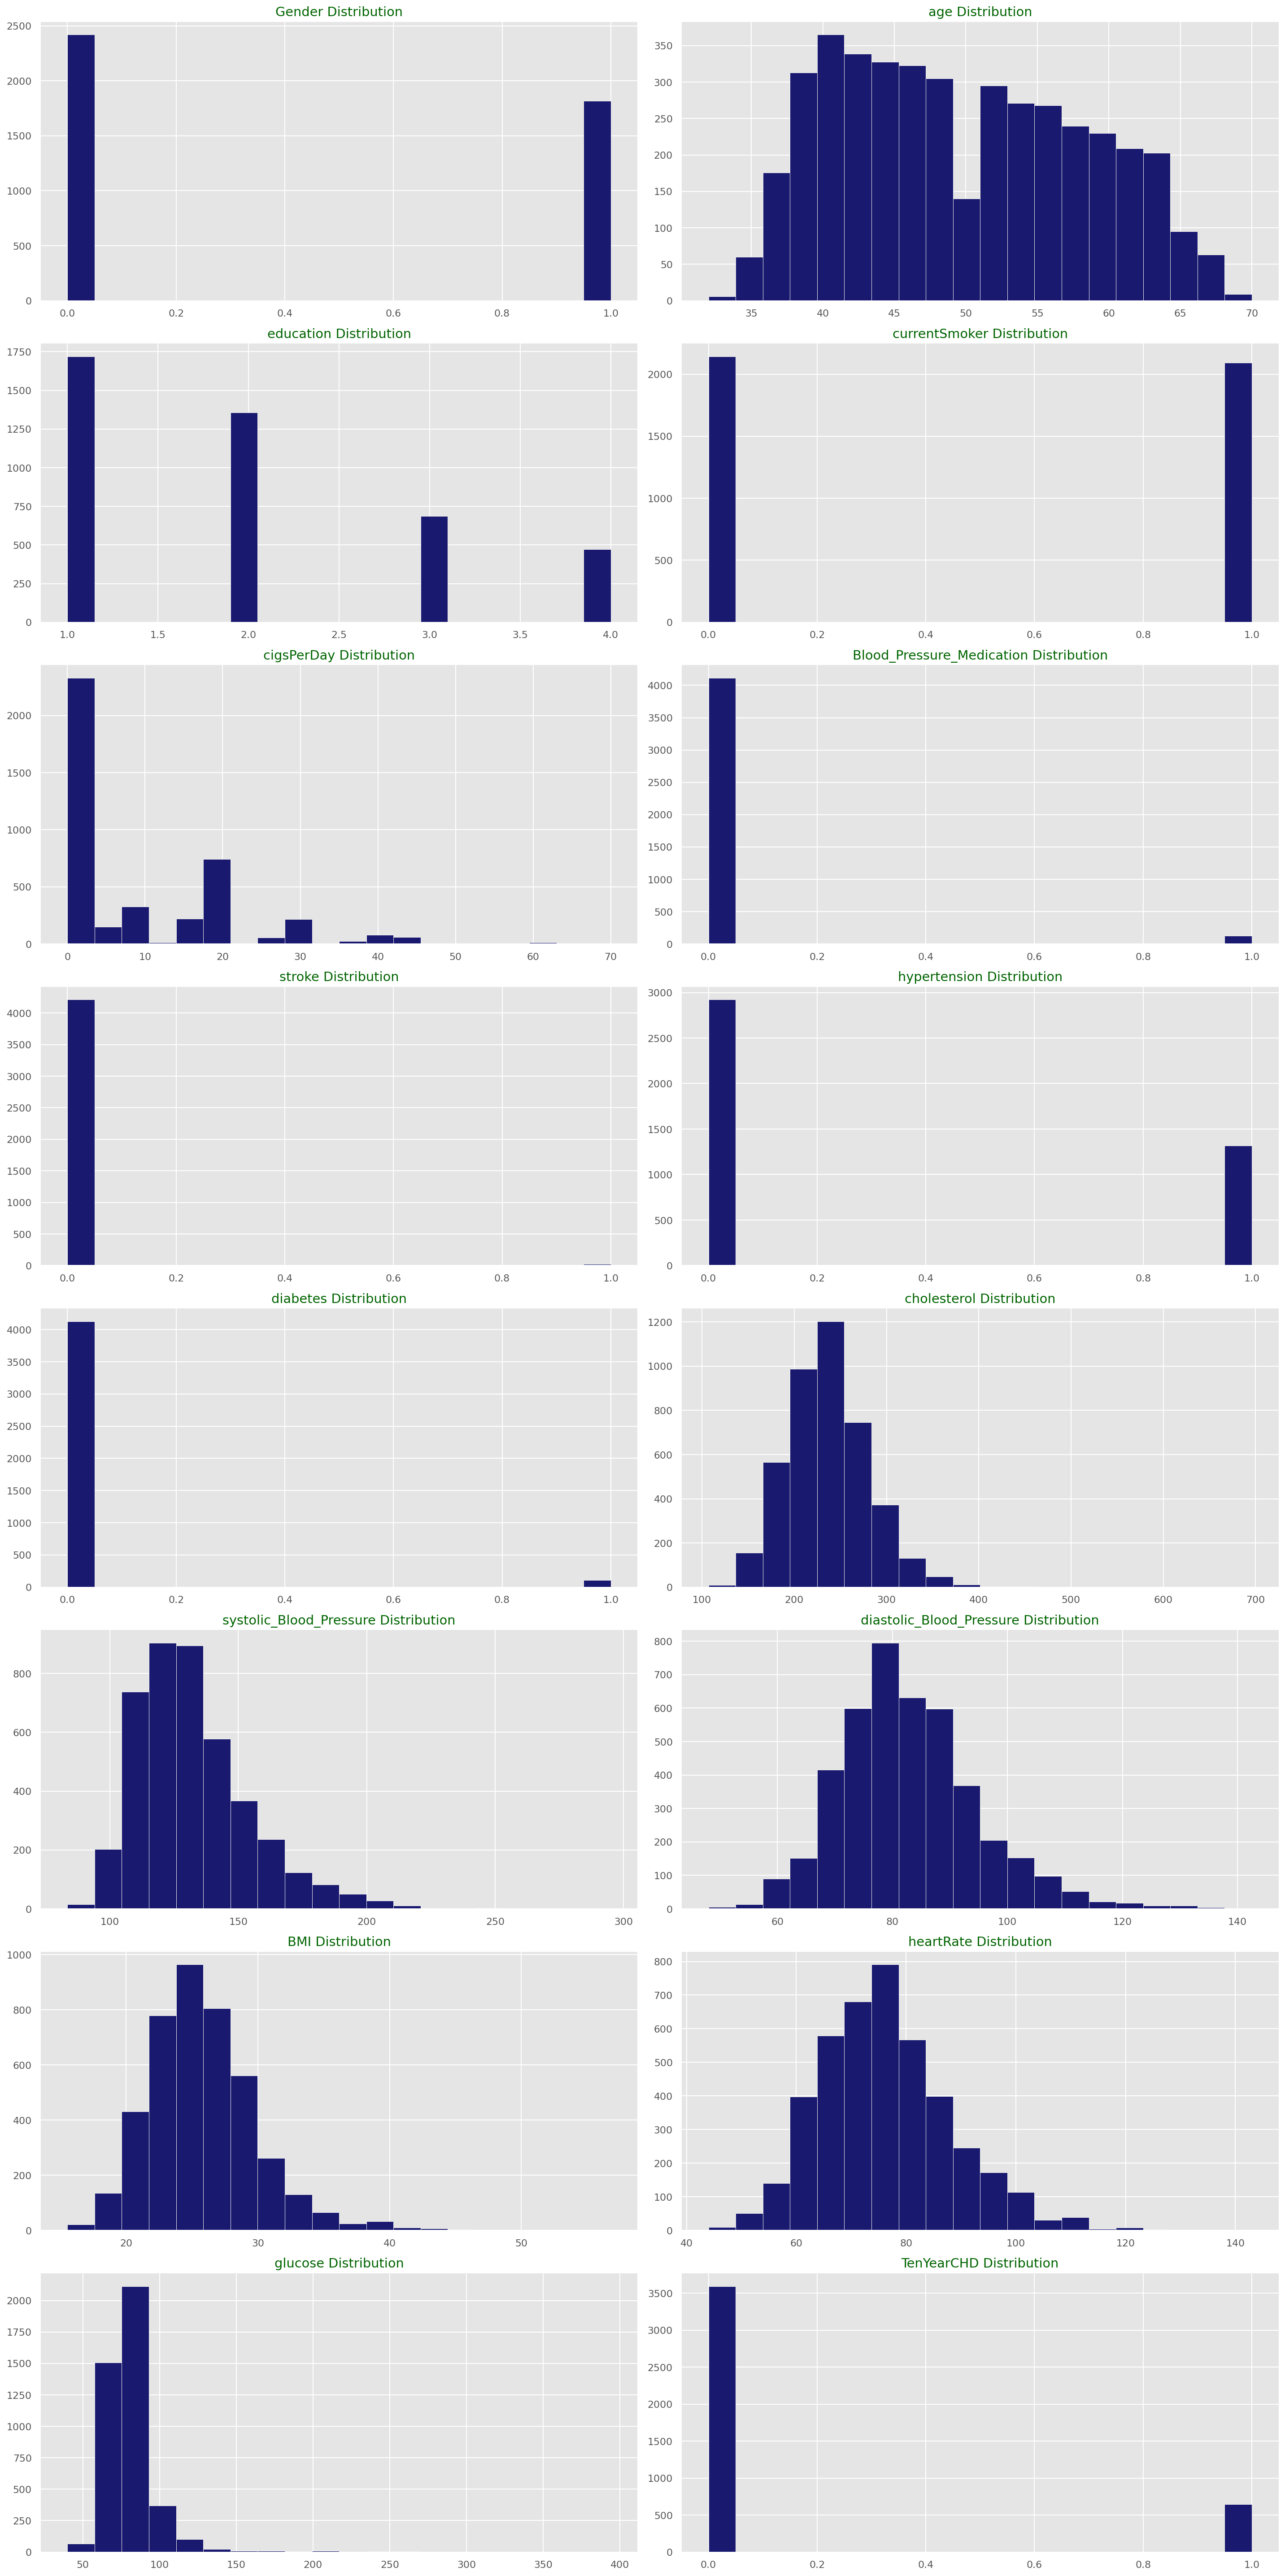

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkGreen')
    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,8,2)

- In a majority of the contuinuous numerical variables distribution, the histograms are skewed to the right. 
- There are definitely more females than males in the study conducted in Farmingham.

cholesterol distribution: the majority of the individuals have cholesterol levels between 200 - 250.

cigsPerDay: most most of the patients smoke less than 10 cigarettes per day.

age distribution: the highest number of patients are aged between 40 - 45 years.

glucose distribution: the most patients have glucose levels approximately 75.

BMI distribution: uniform skewness - most patients have a BMI of around 25.

heatRate: a majority of the patients have a heartRate of about 75.

Blood_Prerssure_Medication distribution: about 90% of all patients are not on blood pressure medication.

stroke distribution: almost all patients 99% are not prevalent to stroke.

#### Scatter plot visualisations

Text(0.5, 1.0, 'Cholesterol scatter plot')

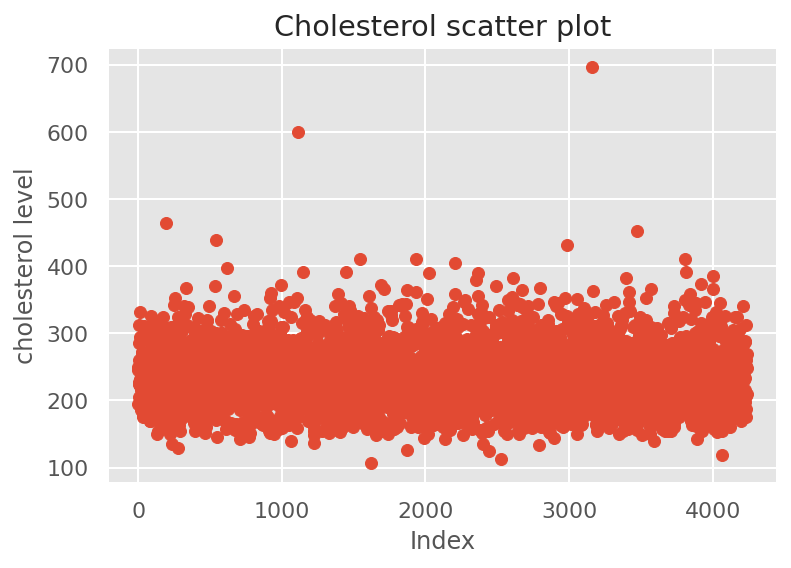

In [ ]:
plt.scatter(heart_df.index,heart_df.cholesterol)
plt.xlabel('Index')
plt.ylabel('cholesterol level')
plt.title('Cholesterol scatter plot')

- The univariate scatter plot shows the observations of different cholesterol levels corresponding to the index/observation number stored in the index of the DataFrame.

[Text(0.5, 1.0, 'Cholesterol scatter distribution in Gender groupings')]

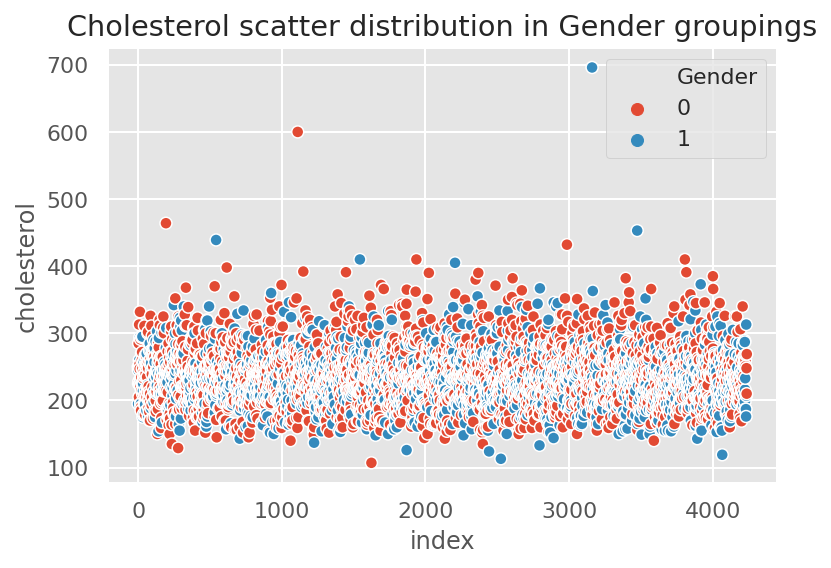

In [ ]:
fig = sns.scatterplot(heart_df.index,heart_df.cholesterol,hue=heart_df.Gender)
fig.set(xlabel='index')
fig.set(title='Cholesterol scatter distribution in Gender groupings')

- seaborn scatter plot showing the observations of varying cholesterol levels corresponding to the index. 
- The different hues and color mapping help differentiate the cholesterol data values according to the Gender type as the categorical variable.

[Text(0.5, 1.0, 'Glucose scatter distribution in TenYearCHD groupings')]

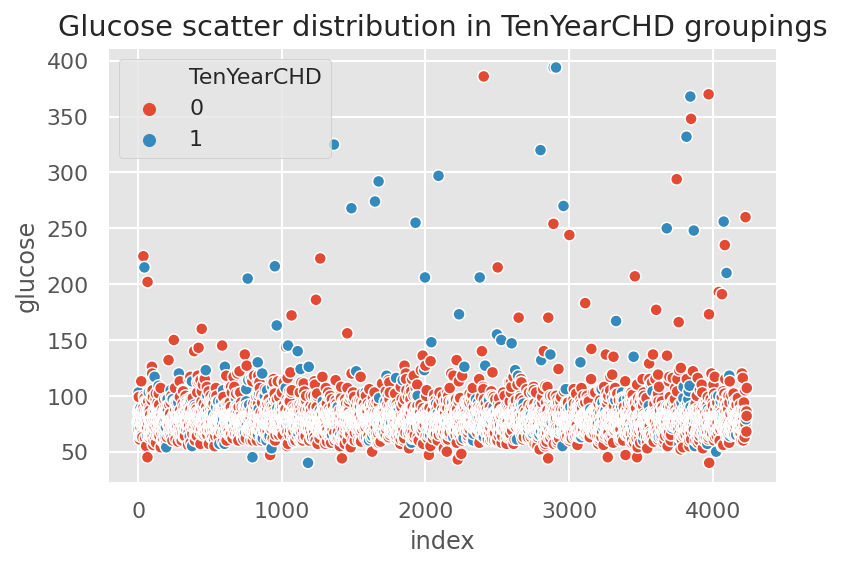

In [ ]:
fig = sns.scatterplot(heart_df.index,heart_df.glucose,hue=heart_df.TenYearCHD)
fig.set(xlabel='index')
fig.set(title='Glucose scatter distribution in TenYearCHD groupings')

- from the above scatter plot, there are definitely more females with glucose levels ranging 100 - 150.

[Text(0.5, 1.0, 'BMI scatter distribution in TenYearCHD groupings')]

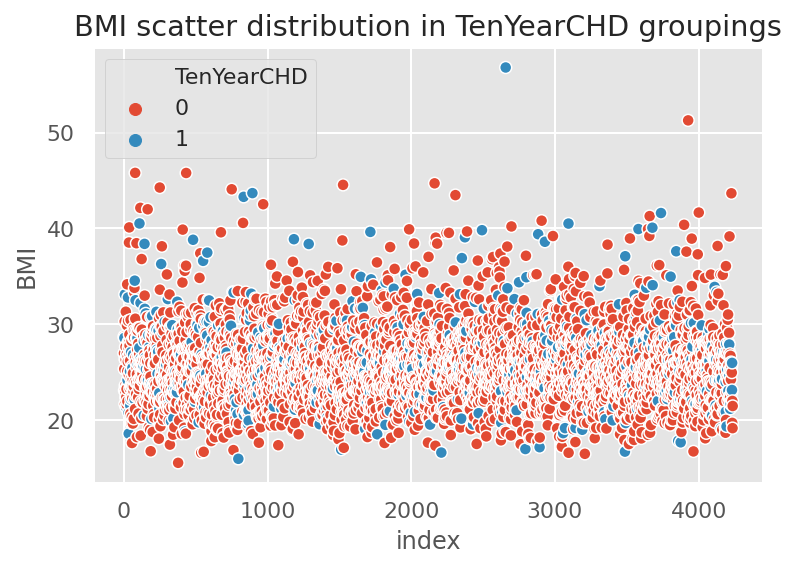

In [ ]:
fig = sns.scatterplot(heart_df.index,heart_df.BMI,hue=heart_df.TenYearCHD)
fig.set(xlabel='index')
fig.set(title='BMI scatter distribution in TenYearCHD groupings')

- seaborn scatter plot showing the observations of varying BMI values corresponding to the index.
- The different hues and color mapping help differentiate the BMI data values according to the TenYearCHD as the categorical variable.

#### Swarm plot visualisation

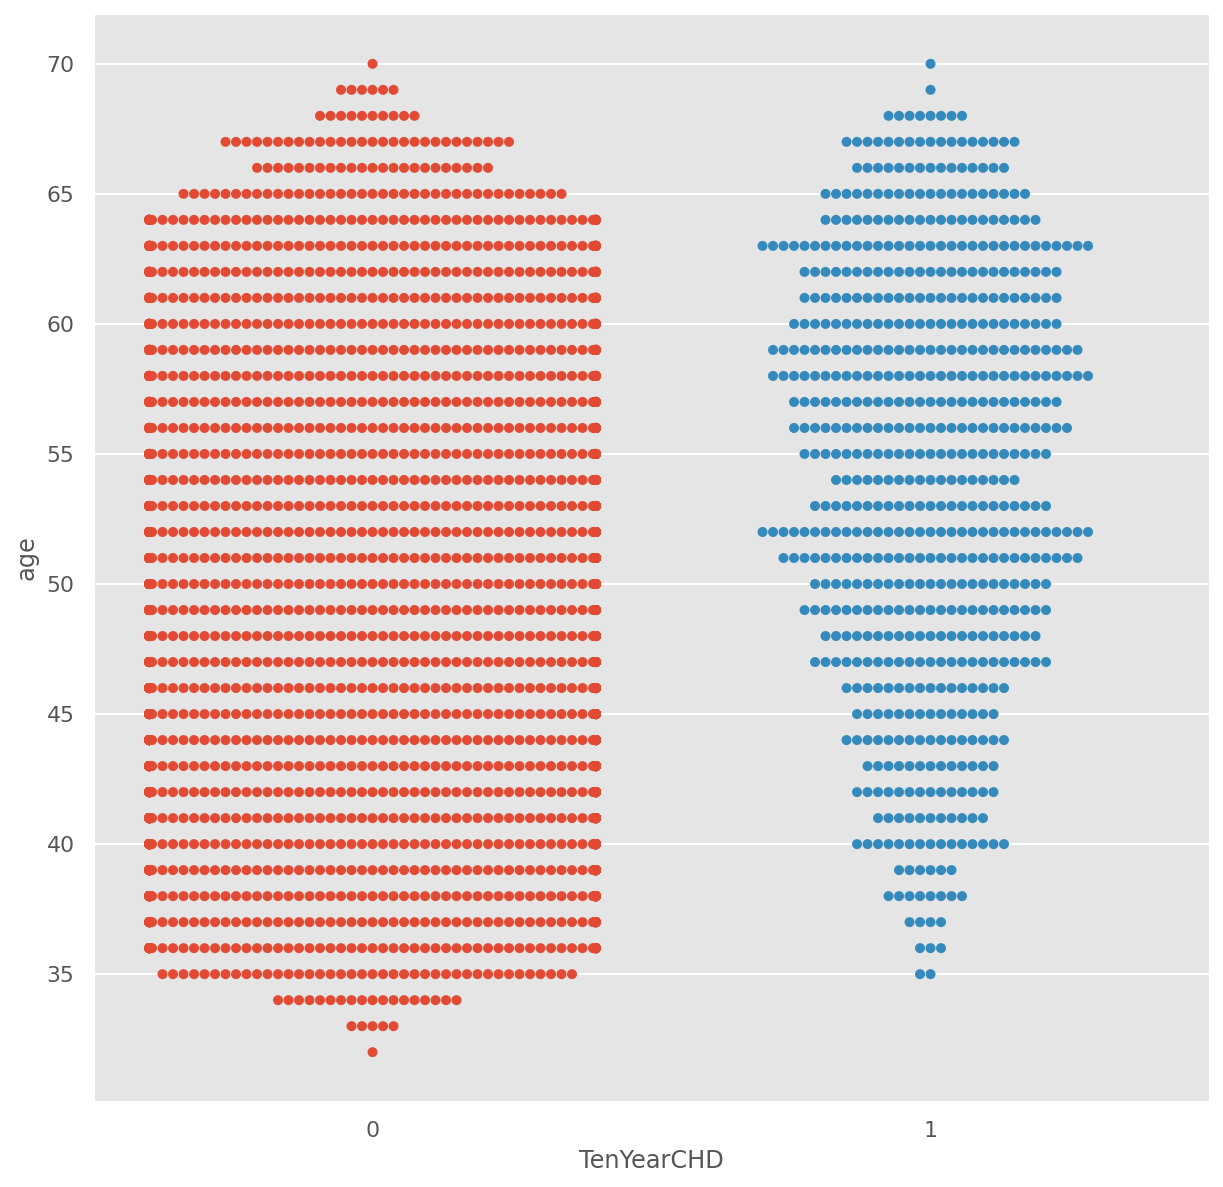

In [ ]:
# age vs TenYearCHD
plt.figure(figsize=(10,10))
sns.swarmplot(x='TenYearCHD', y='age', data=heart_df)

#### Density plot visualisations

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'cholesterol'),
 Text(0.5, 1.0, 'Cholesterol level density plot')]

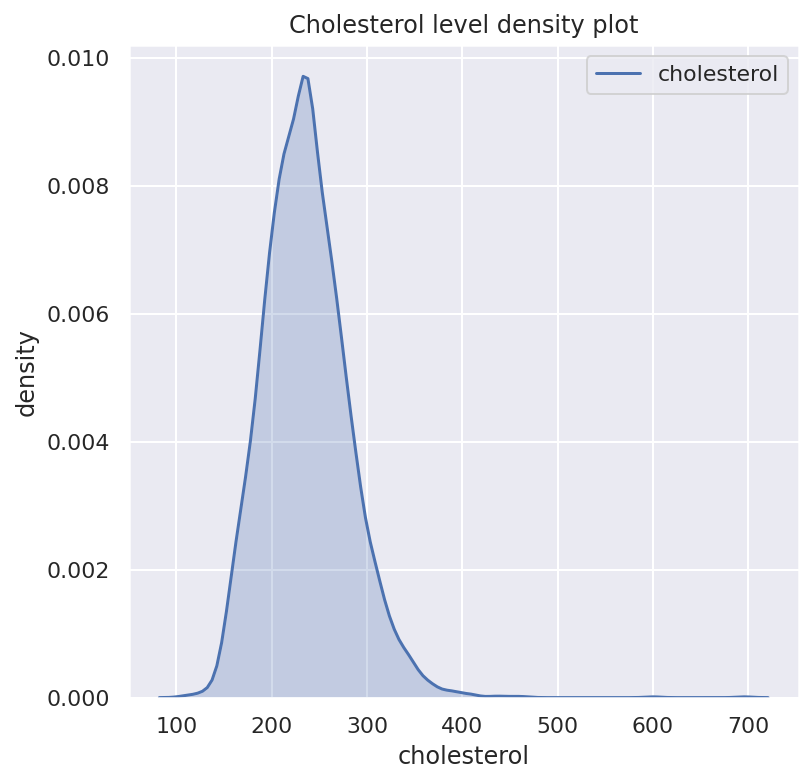

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.kdeplot(heart_df.cholesterol,shade=True)
fig.set(title='Cholesterol level density plot',xlabel='cholesterol',ylabel='density')

- cholesterol levels have a high density between 200 - 250

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'glucose'),
 Text(0.5, 1.0, 'Glucose density plot')]

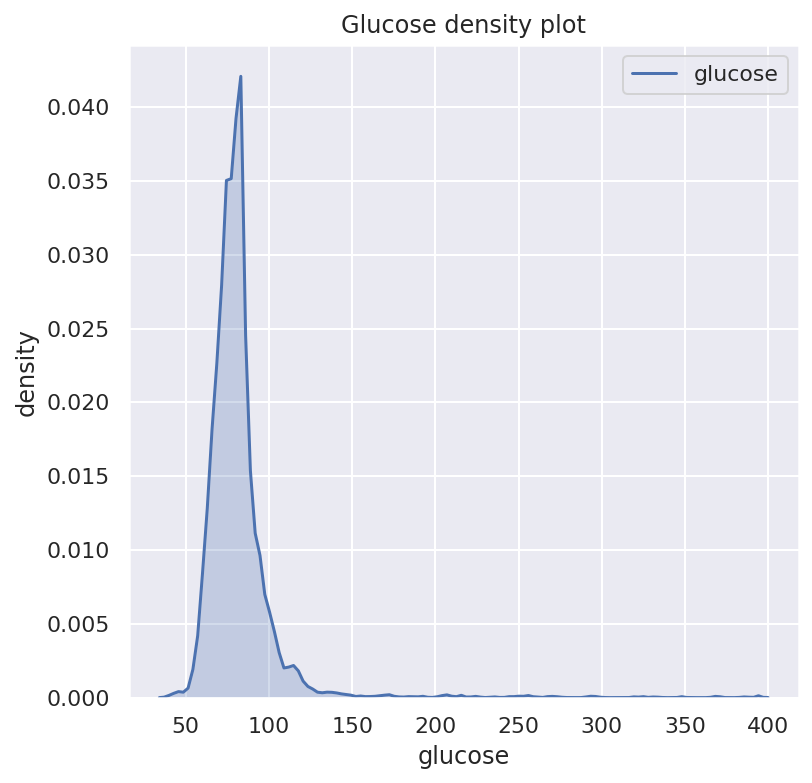

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.kdeplot(heart_df.glucose,shade=True)
fig.set(title='Glucose density plot',xlabel='glucose',ylabel='density')

- glucose level is very dense between 50 - 100

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'BMI'),
 Text(0.5, 1.0, 'BMI density plot')]

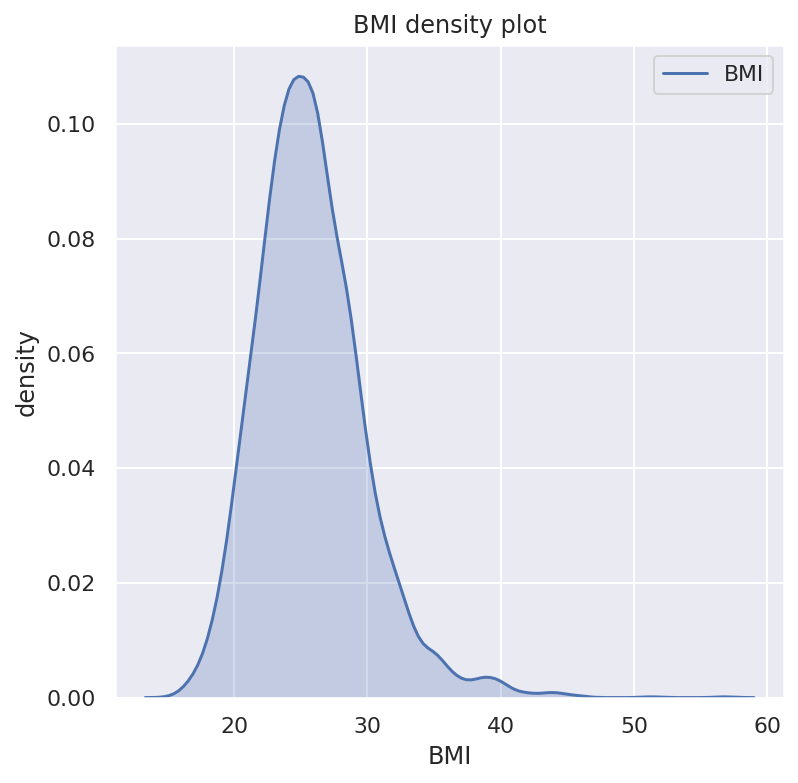

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.kdeplot(heart_df.BMI,shade=True)
fig.set(title='BMI density plot',xlabel='BMI',ylabel='density')

- BMI is very dense at an approximate value of 25

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'heartRate'),
 Text(0.5, 1.0, 'heartRate density plot')]

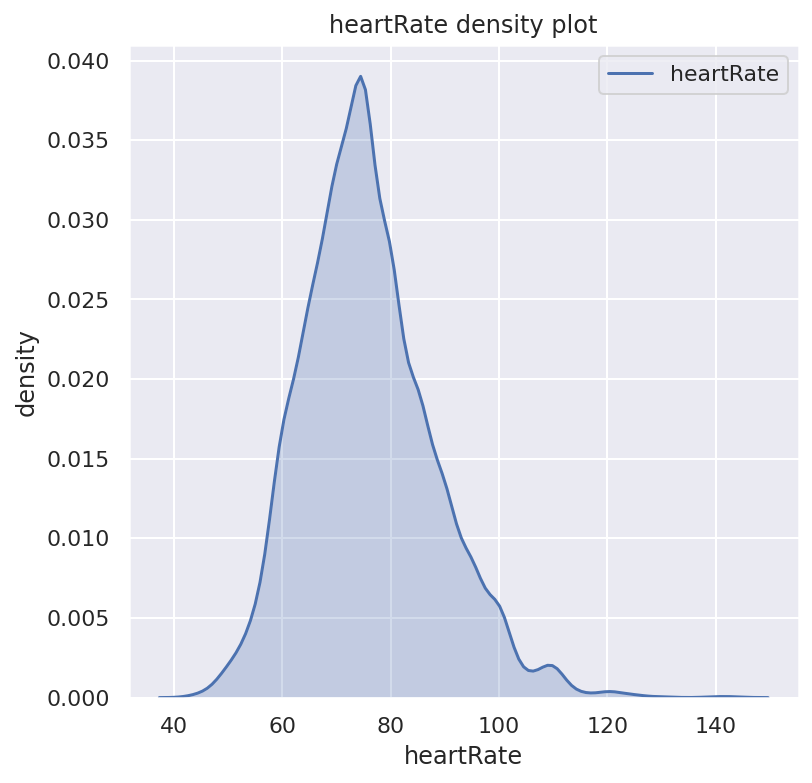

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.kdeplot(heart_df.heartRate,shade=True)
fig.set(title='heartRate density plot',xlabel='heartRate',ylabel='density')

- there is high density of heartRate values between 60 - 80

[Text(0, 0.5, 'density'),
 Text(0.5, 0, 'age'),
 Text(0.5, 1.0, 'age density plot')]

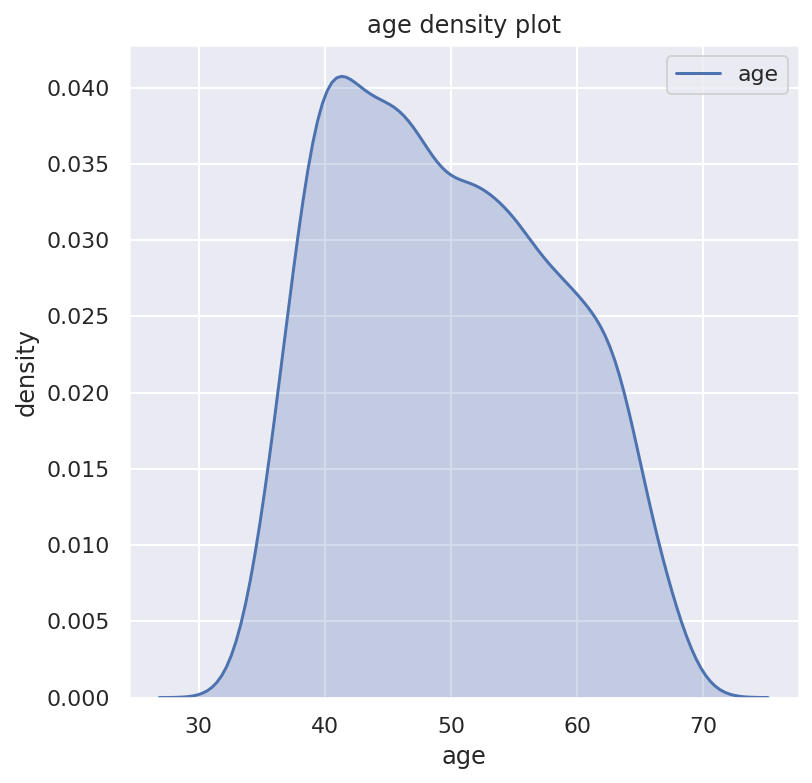

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.kdeplot(heart_df.age,shade=True)
fig.set(title='age density plot',xlabel='age',ylabel='density')

- it is more dense for ages 35 - 60

#### Seaborn distribution plots

[Text(0.5, 1.0, 'age distribution plot')]

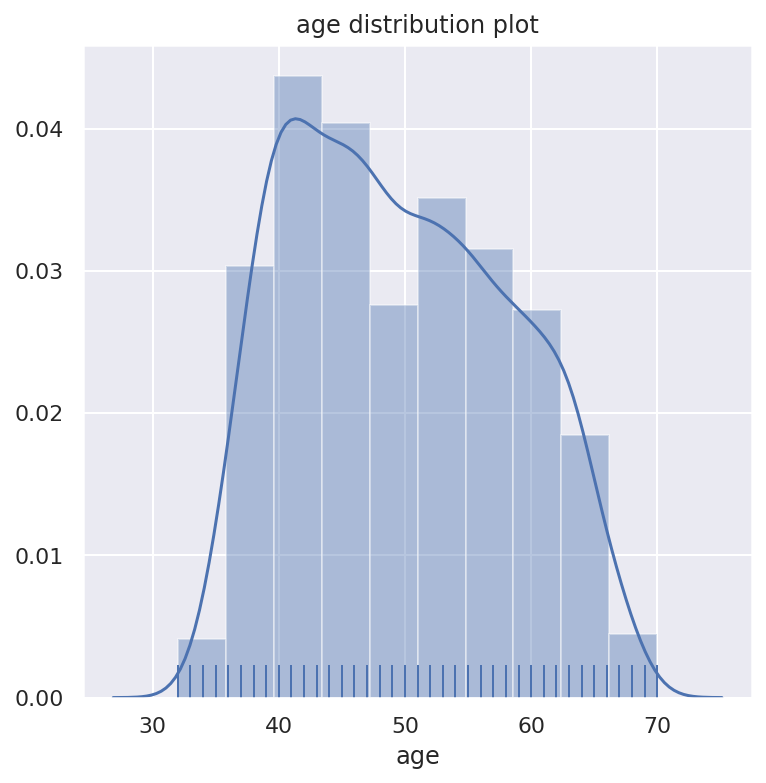

In [ ]:
# seaborn distribution plot
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.distplot(heart_df.age,bins=10,rug=True)
fig.set(title='age distribution plot')

- age is more distributed between 40 - 55 years of age

[Text(0.5, 1.0, 'cholesterol distribution plot')]

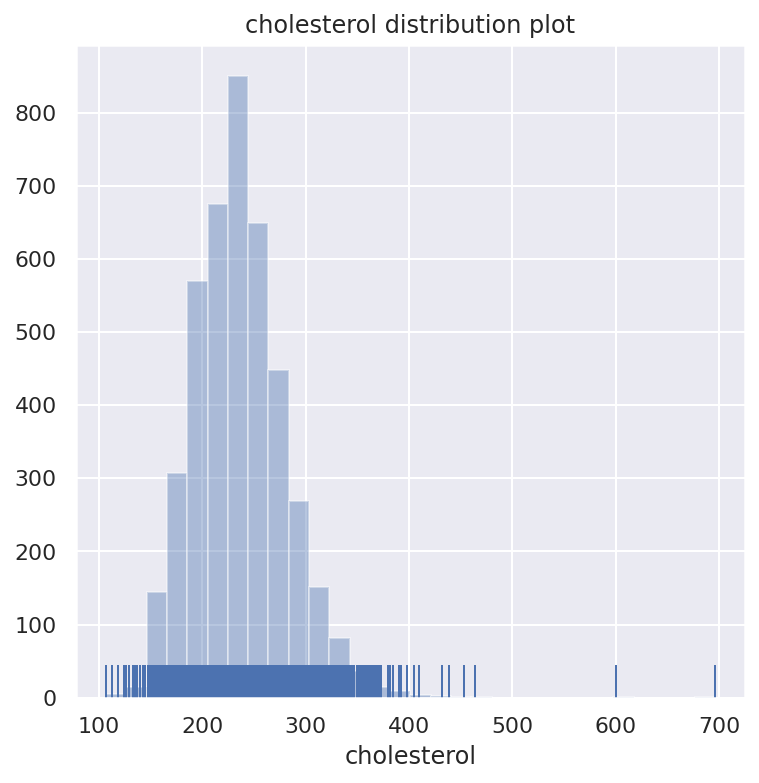

In [ ]:
sns.set(rc=({'figure.figsize':(6,6)}))
fig = sns.distplot(heart_df.cholesterol,kde=False,bins=30,rug=True)
fig.set(title='cholesterol distribution plot')

- very high distribution of cholesterol levels between 200 - 300

[Text(0.5, 1.0, 'systolic_Blood_Pressure distribution plot')]

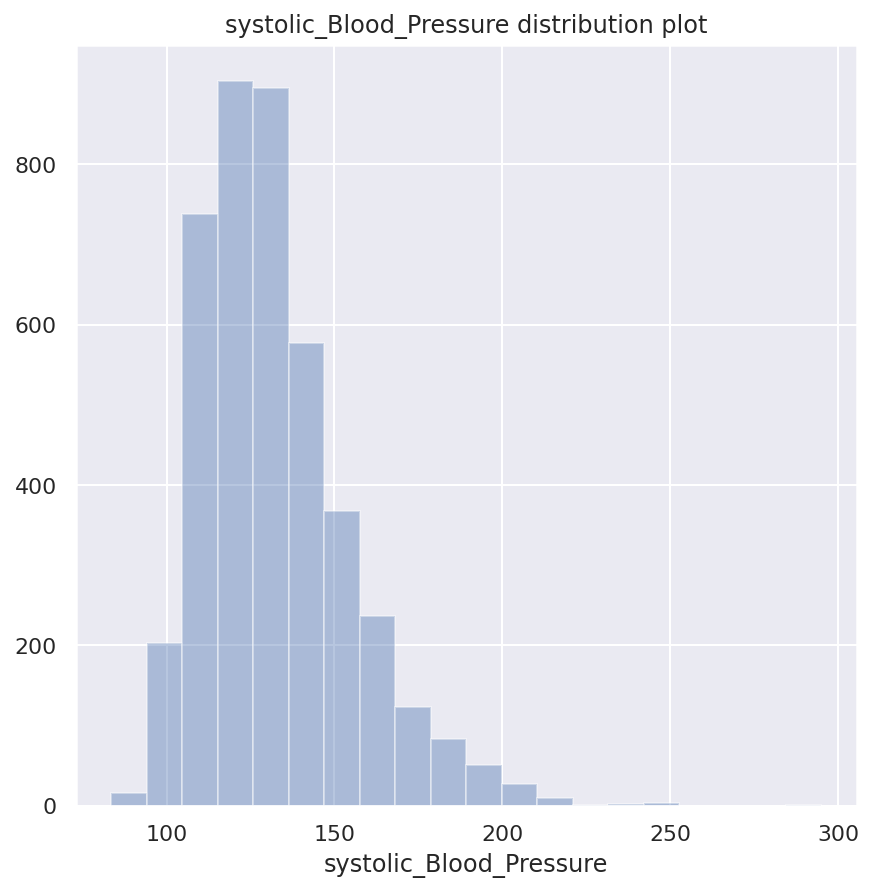

In [ ]:
sns.set(rc=({'figure.figsize':(7,7)}))
fig = sns.distplot(heart_df.systolic_Blood_Pressure,kde=False,bins=20)
fig.set(title='systolic_Blood_Pressure distribution plot')

- systolic_Blood_Pressure between around 110 - 130 is highly distributed

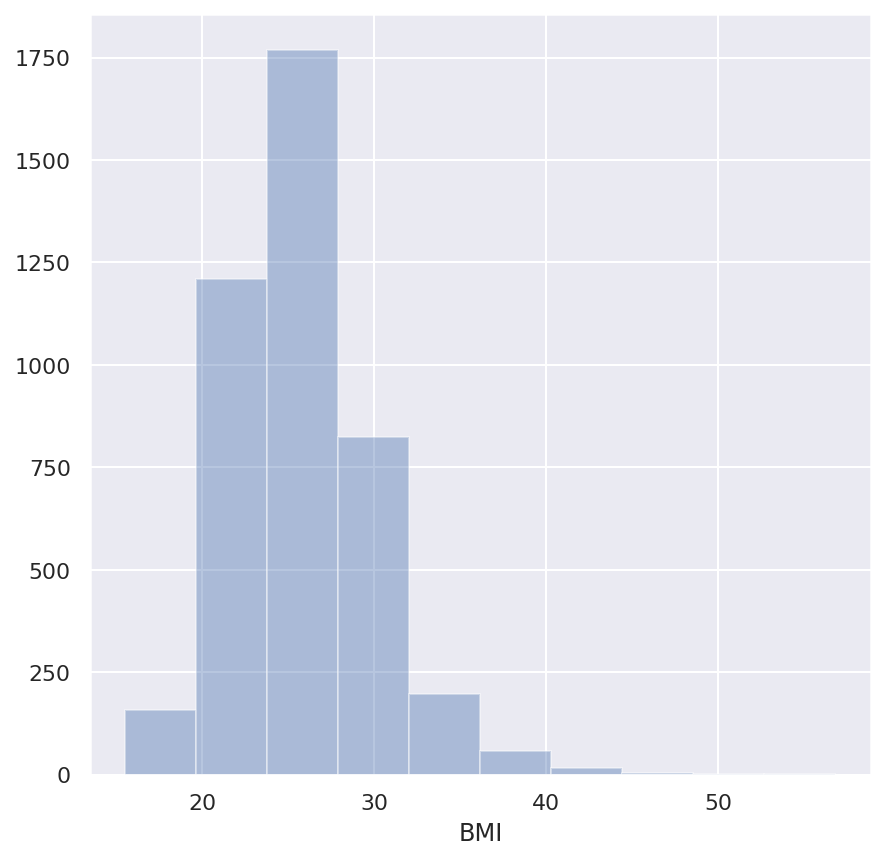

In [ ]:
sns.distplot(heart_df.BMI,kde=False,bins=10)

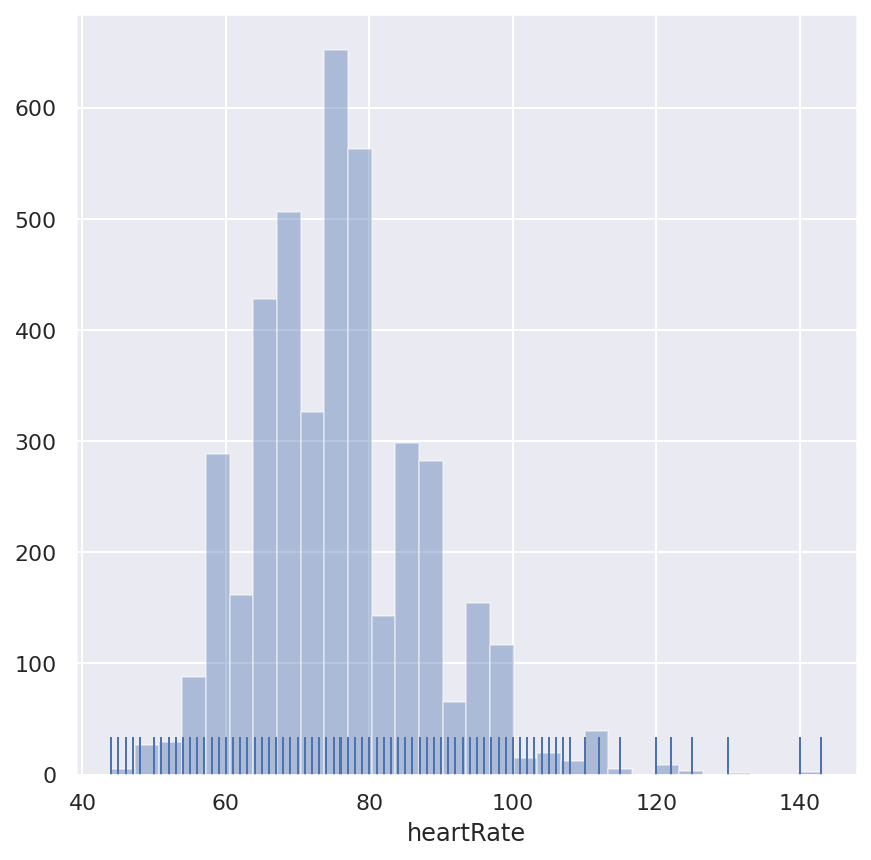

In [ ]:
sns.distplot(heart_df.heartRate,kde=False,bins=30,rug=True)

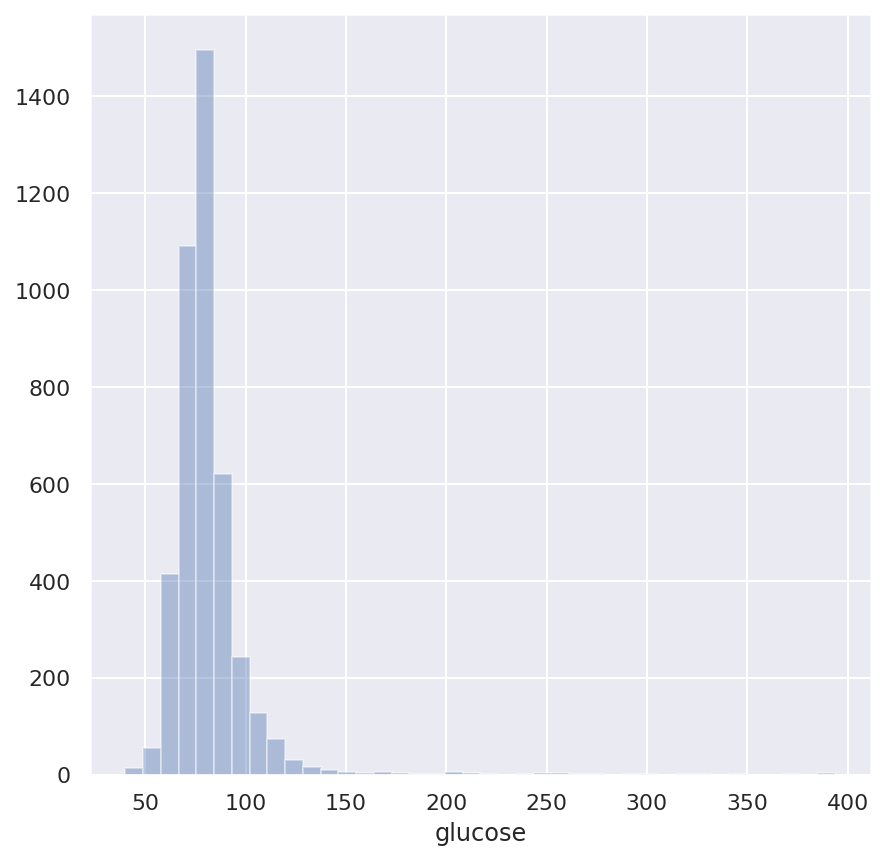

In [ ]:
sns.distplot(heart_df.glucose,kde=False,bins=40)

[Text(0.5, 1.0, 'Barplot for Diabetes and TenYearCHD')]

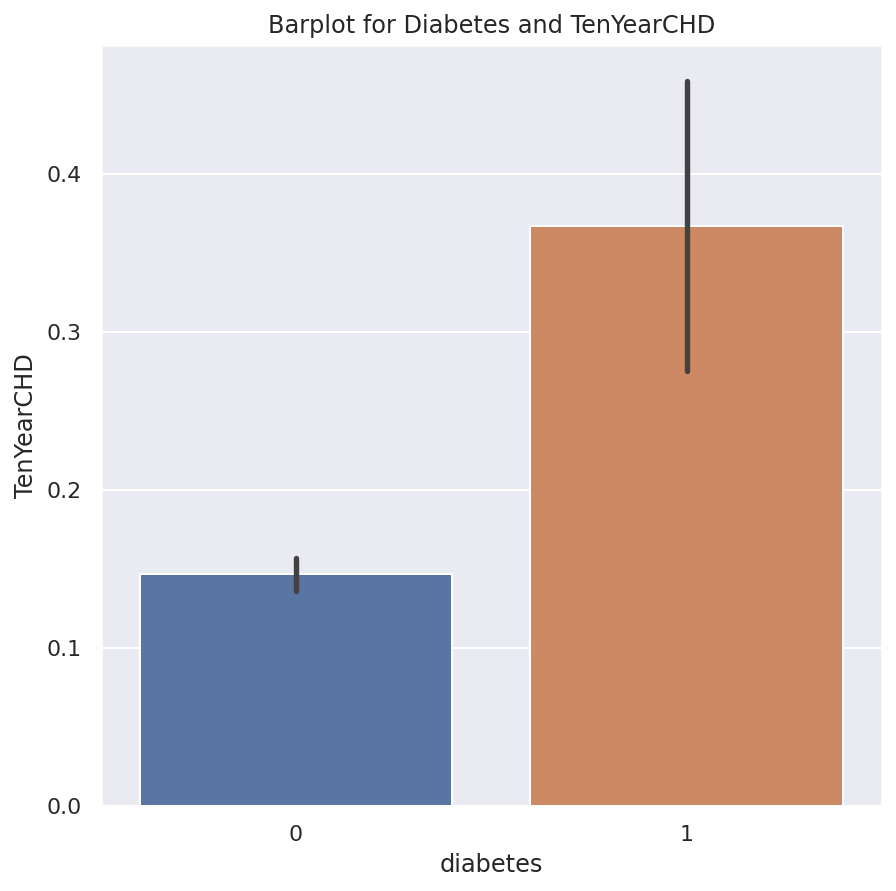

In [ ]:
fig = sns.barplot(x='diabetes',y='TenYearCHD',data=heart_df)
fig.set(title='Barplot for Diabetes and TenYearCHD')

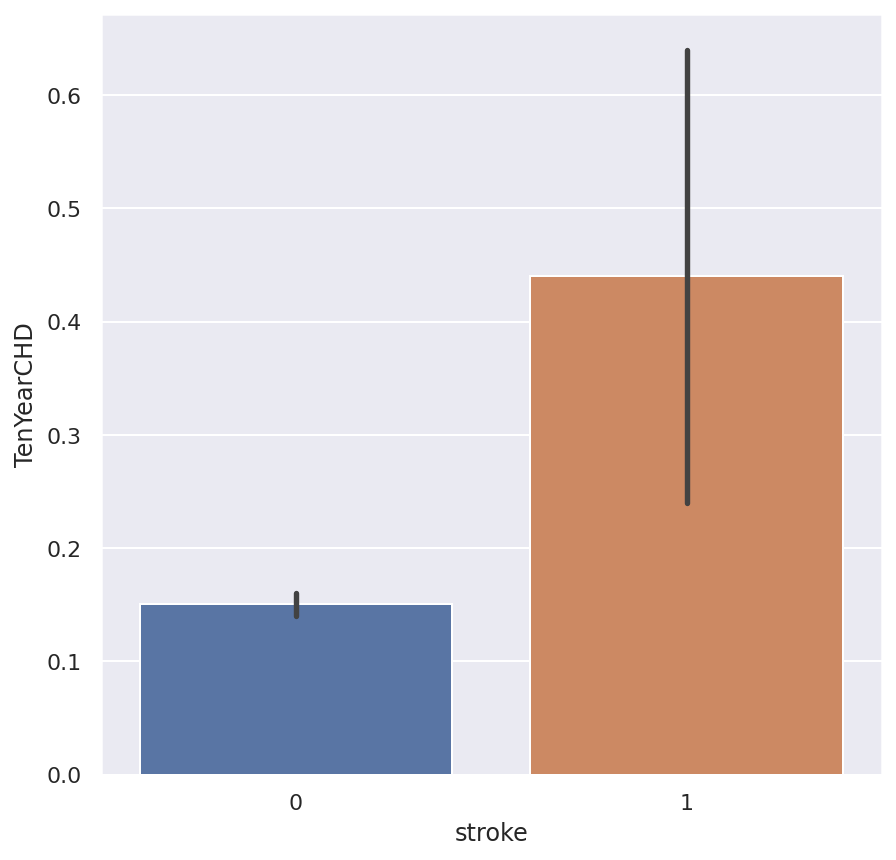

In [ ]:
sns.barplot(x='stroke',y='TenYearCHD',data=heart_df)

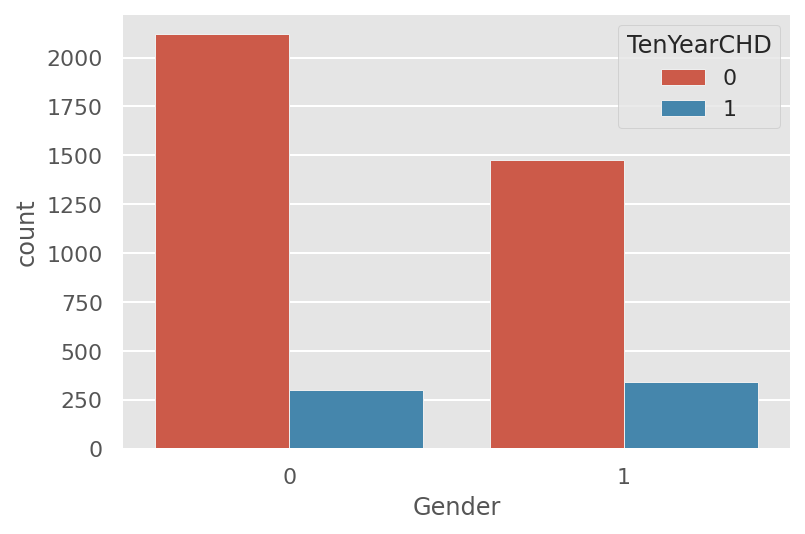

In [ ]:
# male and female having coronary disease or not
sns.countplot(x=heart_df['Gender'], hue=heart_df['TenYearCHD'])

Here from the above countplot, we see that most data are females

There are more females having no risk than males having no risk

There are slightly more males having risk than females having risk

[Text(0.5, 1.0, 'Quartile distribution of patient data')]

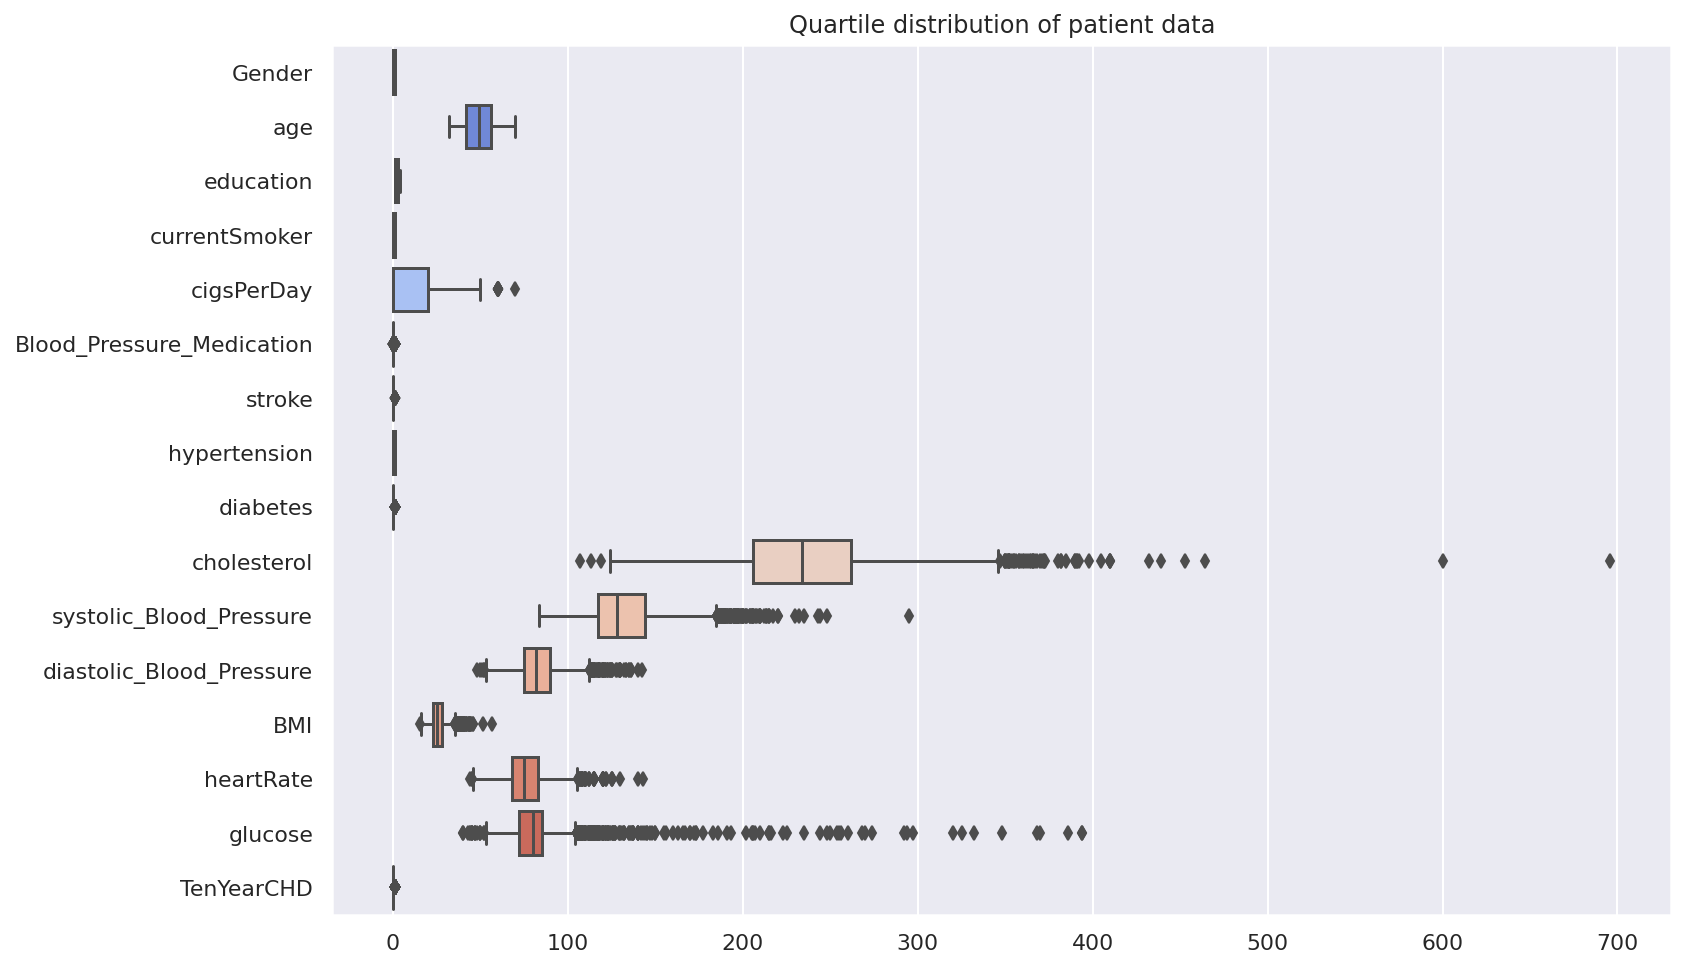

In [ ]:
sns.set(rc=({'figure.figsize':(12,8)}))
fig = sns.boxplot(data=heart_df,palette='coolwarm',orient='h')
fig.set(title='Quartile distribution of patient data')

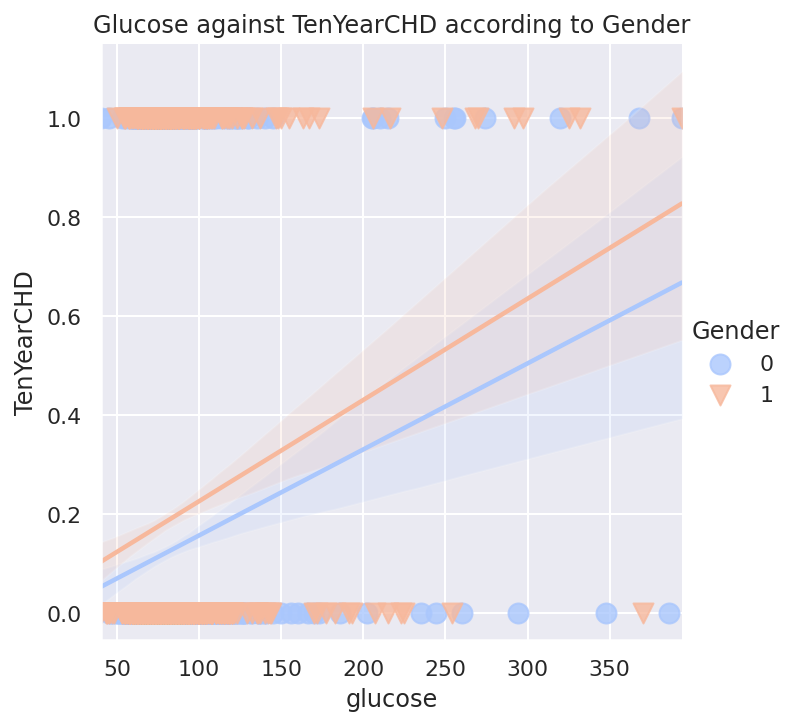

In [ ]:
sns.set(rc=({'figure.figsize':(8,10)}))
fig = sns.lmplot(x='glucose',y='TenYearCHD',data=heart_df,hue='Gender',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})
fig.set(title='Glucose against TenYearCHD according to Gender')

#### Using faceting variables 'glucose' and 'cholesterol' to visualise multiple higher-dimensional relationships between them.

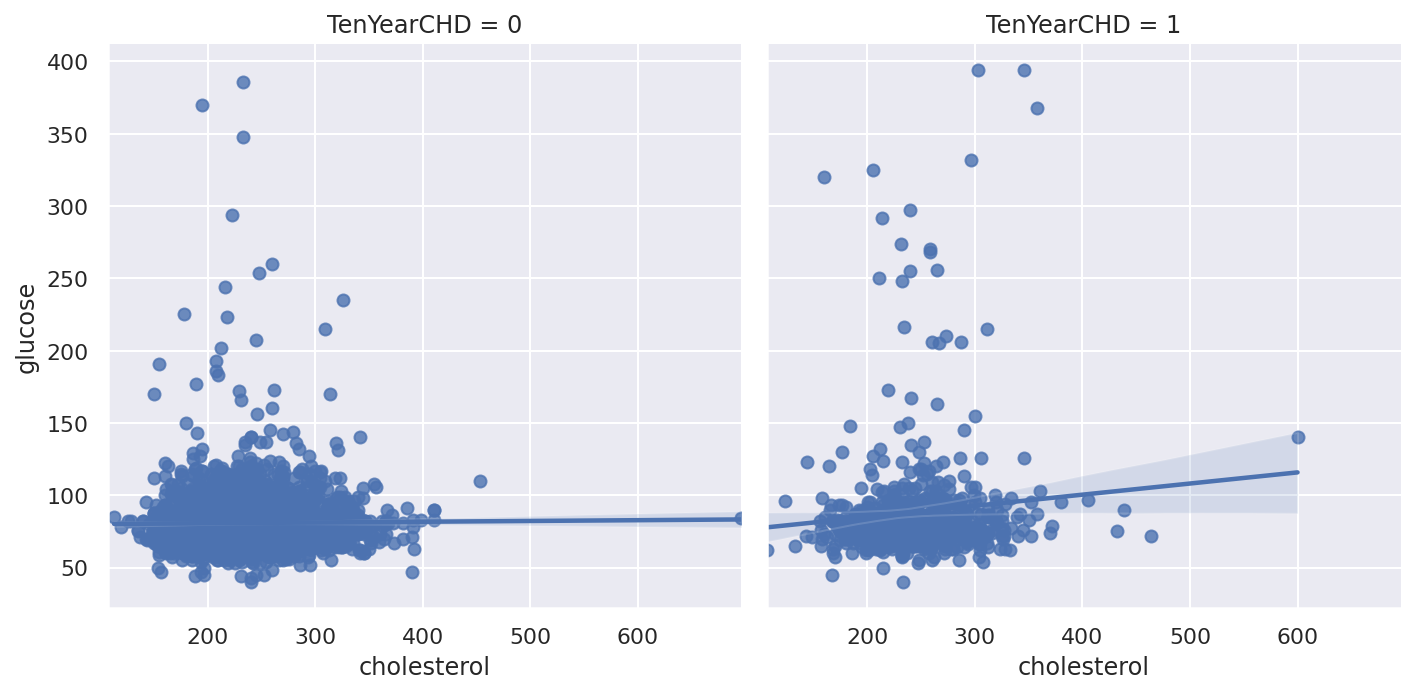

In [ ]:
sns.lmplot(x='cholesterol',y='glucose',data=heart_df,col='TenYearCHD')

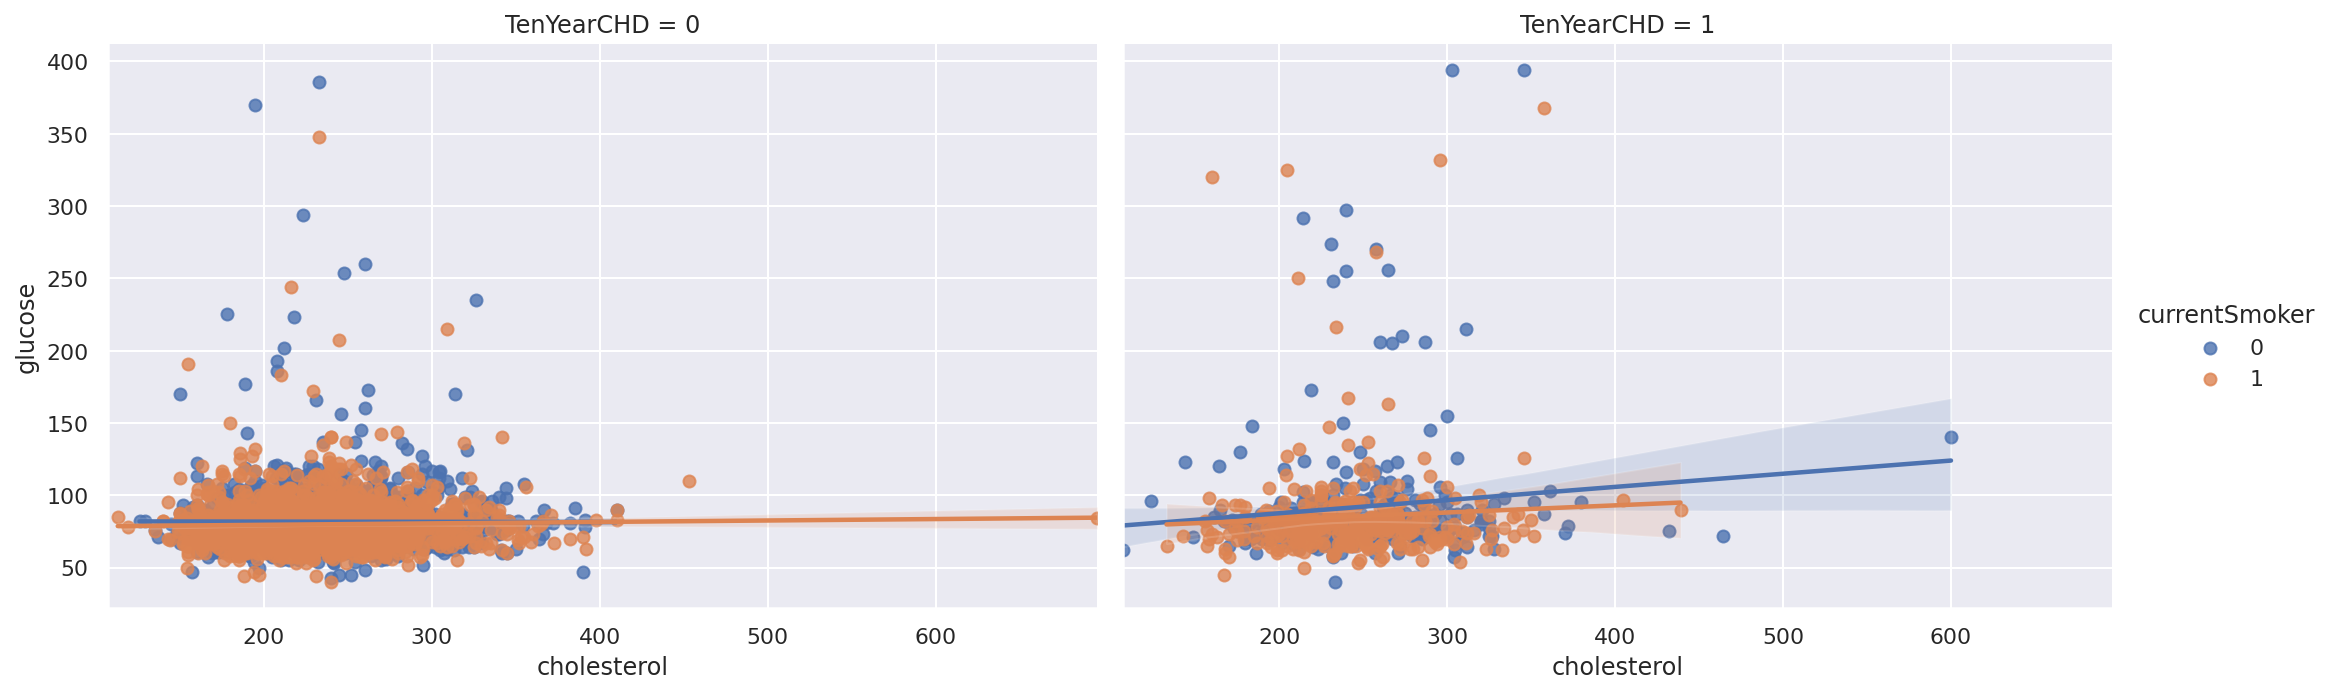

In [ ]:
sns.lmplot(x='cholesterol',y='glucose',data=heart_df,col='TenYearCHD',hue='currentSmoker',aspect=1.5)

- alot of the patients have glucose levels between 50 - 150 and cholesterol levels lower than 400.
- of those at risk of contracting coronary heart disease, a majority are current smokers.

### Multicollinearity Visualisations
- Using variable inflation factors (VIF) to determine the strength of the correlation between independent variables.

In [113]:
# detecting multicollinearity using VIF

# importing a library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    # calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

The function calc_vif() calculates the VIF of individual variables to determine their correlation.
- VIF starts at 1 and has no upper limit
- VIF = 1, no  correlation between the independent variable and the other variable
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [114]:
x = heart_df.iloc[:,:-1]
calc_vif(x)

variables         VIF
0                      Gender    2.090240
1                         age   40.890138
2                   education    4.746139
3               currentSmoker    4.854980
4                  cigsPerDay    4.158175
5   Blood_Pressure_Medication    1.132593
6                      stroke    1.025069
7                hypertension    2.387052
8                    diabetes    1.566689
9                 cholesterol   31.490107
10    systolic_Blood_Pressure  137.602222
11   diastolic_Blood_Pressure  135.835556
12                        BMI   45.051949
13                  heartRate   38.740708
14                    glucose   21.048922

- more than half of the independent predictor variables have moderate multicollinearity.
- 'age', 'cholesterol', 'BMI', 'heartRate', 'glucose', 'systolic_Blood_Pressure' and ''diastolic_Blood_Pressure' have high VIF values; they can be predicted by other independent variables in the dataset. 
- Although there is no upper limit for the VIF value, multicollinearity between systolic_Blood_Pressure and other variables, and diastolic_Blood_Pressure and other variables is very high.

I preferred VIF to correlation matrix and scatter plots, because it can show the correlation of a variable with other a group of other variables, and not just the the bivariate relationship between independent variables.

### Combining the correlated variables of interest into one and dropping the others.
- Combining 'systolic_Blood_Pressure' and 'diastolic_Blood_Pressure' into one variable 'Blood_Pressure' to reduce the multicollinearity.

In [115]:
df2 = heart_df.copy()
n = heart_df
df2['Blood_Pressure'] = heart_df.apply(lambda n: (n.systolic_Blood_Pressure + n.diastolic_Blood_Pressure)*.5,axis=1)
x = df2.drop(['systolic_Blood_Pressure','diastolic_Blood_Pressure','TenYearCHD'],axis=1)
x['TenYearCHD'] = heart_df.TenYearCHD

calc_vif(x)

variables        VIF
0                      Gender   2.052086
1                         age  39.796450
2                   education   4.691331
3               currentSmoker   4.856095
4                  cigsPerDay   4.170682
5   Blood_Pressure_Medication   1.130495
6                      stroke   1.026656
7                hypertension   2.363558
8                    diabetes   1.565099
9                 cholesterol  31.437316
10                        BMI  43.501509
11                  heartRate  38.559072
12                    glucose  21.054041
13             Blood_Pressure  84.864471
14                 TenYearCHD   1.283443

The above actions are to reduce the multicollinearity between the independent variables.

This is necessary because high correlation between predictor variables would obscure the real relationship between the predictor and response variables.

In [116]:
# new DataFrame
x

Gender  age  education  ...     glucose  Blood_Pressure  TenYearCHD
0          1   39        4.0  ...   77.000000           88.00           0
1          0   46        2.0  ...   76.000000          101.00           0
2          1   48        1.0  ...   70.000000          103.75           0
3          0   61        3.0  ...  103.000000          122.50           1
4          0   46        3.0  ...   85.000000          107.00           0
...      ...  ...        ...  ...         ...             ...         ...
4233       1   50        1.0  ...   86.000000          135.50           1
4234       1   51        3.0  ...   68.000000          103.25           0
4235       0   48        2.0  ...   86.000000          101.50           0
4236       0   44        1.0  ...   81.966753          106.75           0
4237       0   52        2.0  ...  107.000000          108.25           0

[4238 rows x 15 columns]

### **Normalization pre-modelling**
 - transformation by feature scaling 0 - 1

In [117]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x)

# transform data
scaled_df = norm.transform(x)
scaled_df = pd.DataFrame(scaled_df,columns=['Gender','age','education','currentSmoker','cigsPerDay','Blood_Pressure_Medication','stroke','hypertension','diabetes','cholesterol','BMI','heartRate','glucose','Blood_Pressure','TenYearCHD'])

scaled_df

Gender       age  education  ...   glucose  Blood_Pressure  TenYearCHD
0        1.0  0.184211   1.000000  ...  0.104520        0.134583         0.0
1        0.0  0.368421   0.333333  ...  0.101695        0.223169         0.0
2        1.0  0.421053   0.000000  ...  0.084746        0.241908         0.0
3        0.0  0.763158   0.666667  ...  0.177966        0.369676         1.0
4        0.0  0.368421   0.666667  ...  0.127119        0.264055         0.0
...      ...       ...        ...  ...       ...             ...         ...
4233     1.0  0.473684   0.000000  ...  0.129944        0.458262         1.0
4234     1.0  0.500000   0.666667  ...  0.079096        0.238501         0.0
4235     0.0  0.421053   0.333333  ...  0.129944        0.226576         0.0
4236     0.0  0.315789   0.000000  ...  0.118550        0.262351         0.0
4237     0.0  0.526316   0.333333  ...  0.189266        0.272572         0.0

[4238 rows x 15 columns]

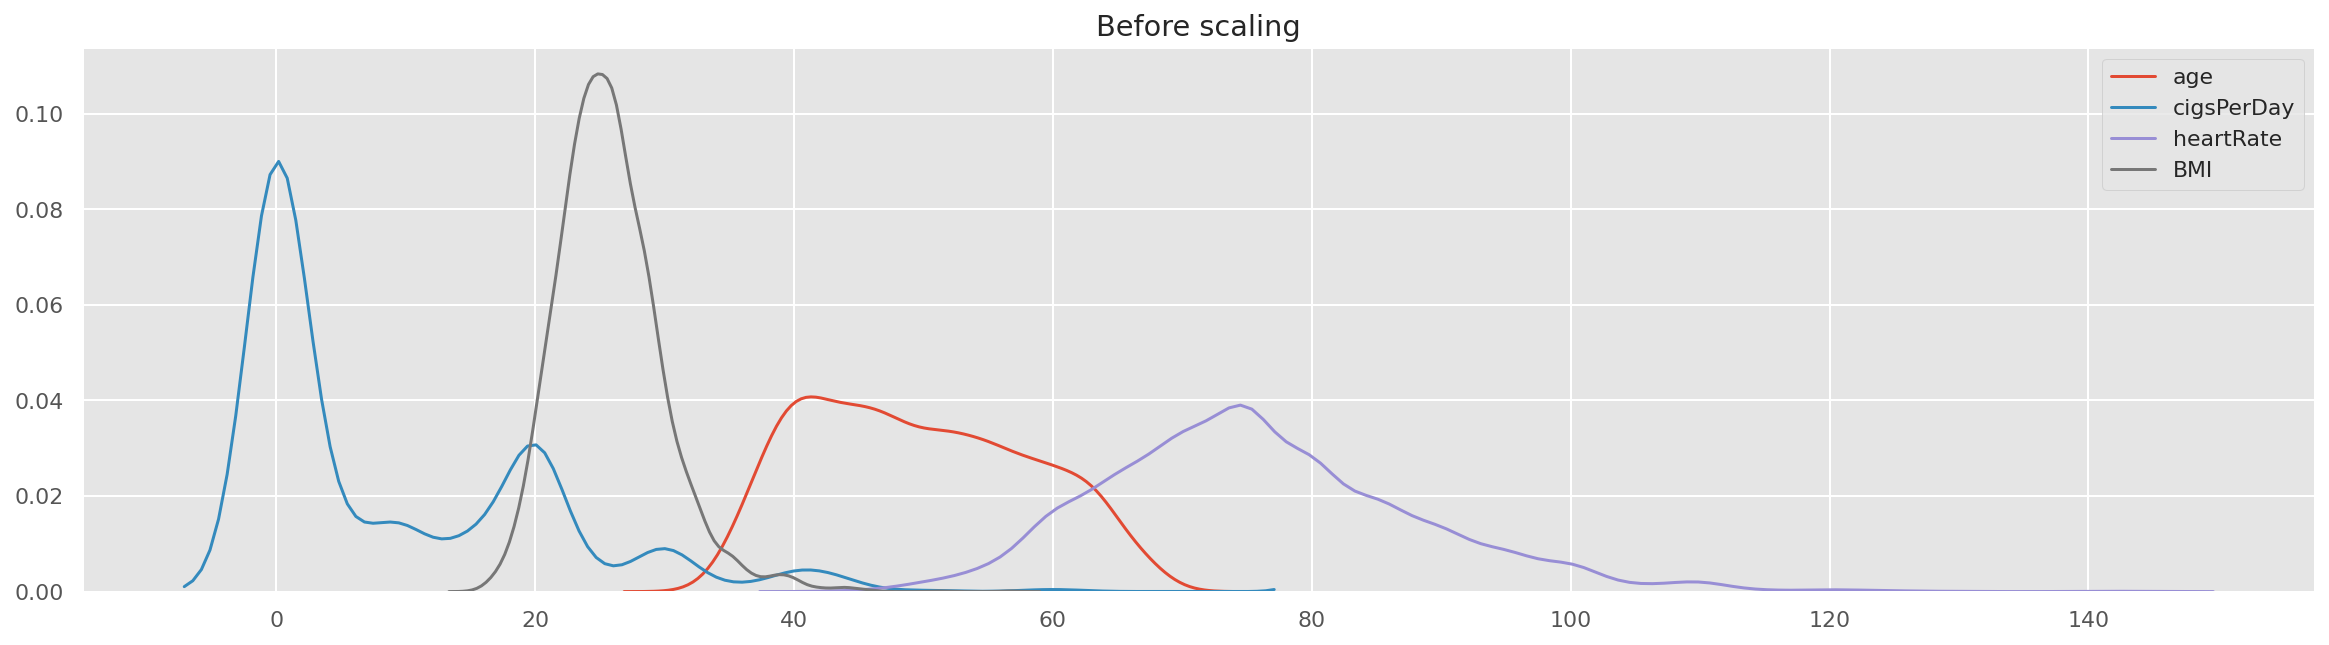

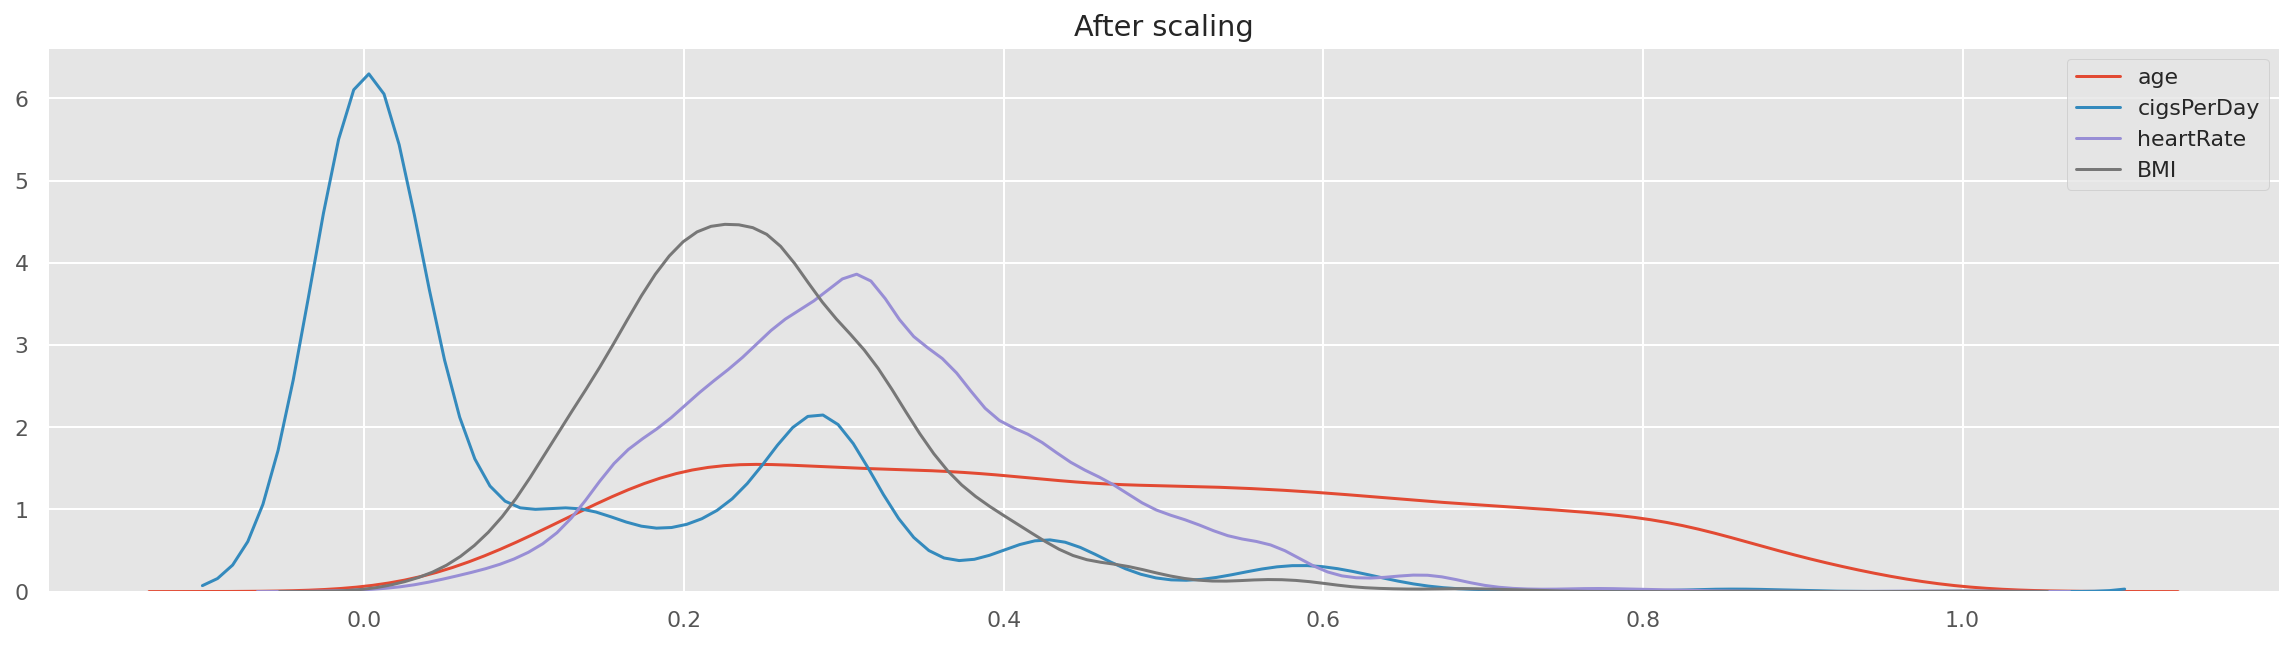

In [118]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Before scaling')
sns.kdeplot(x.age,ax=ax1)
sns.kdeplot(x.cigsPerDay,ax=ax1)
sns.kdeplot(x.heartRate,ax=ax1)
sns.kdeplot(x.BMI,ax=ax1)


fig, ax2 = plt.subplots(figsize=(20,5))
ax2.set_title('After scaling')
sns.kdeplot(scaled_df.age,ax=ax2)
sns.kdeplot(scaled_df.cigsPerDay,ax=ax2)
sns.kdeplot(scaled_df.heartRate,ax=ax2)
sns.kdeplot(scaled_df.BMI,ax=ax2)


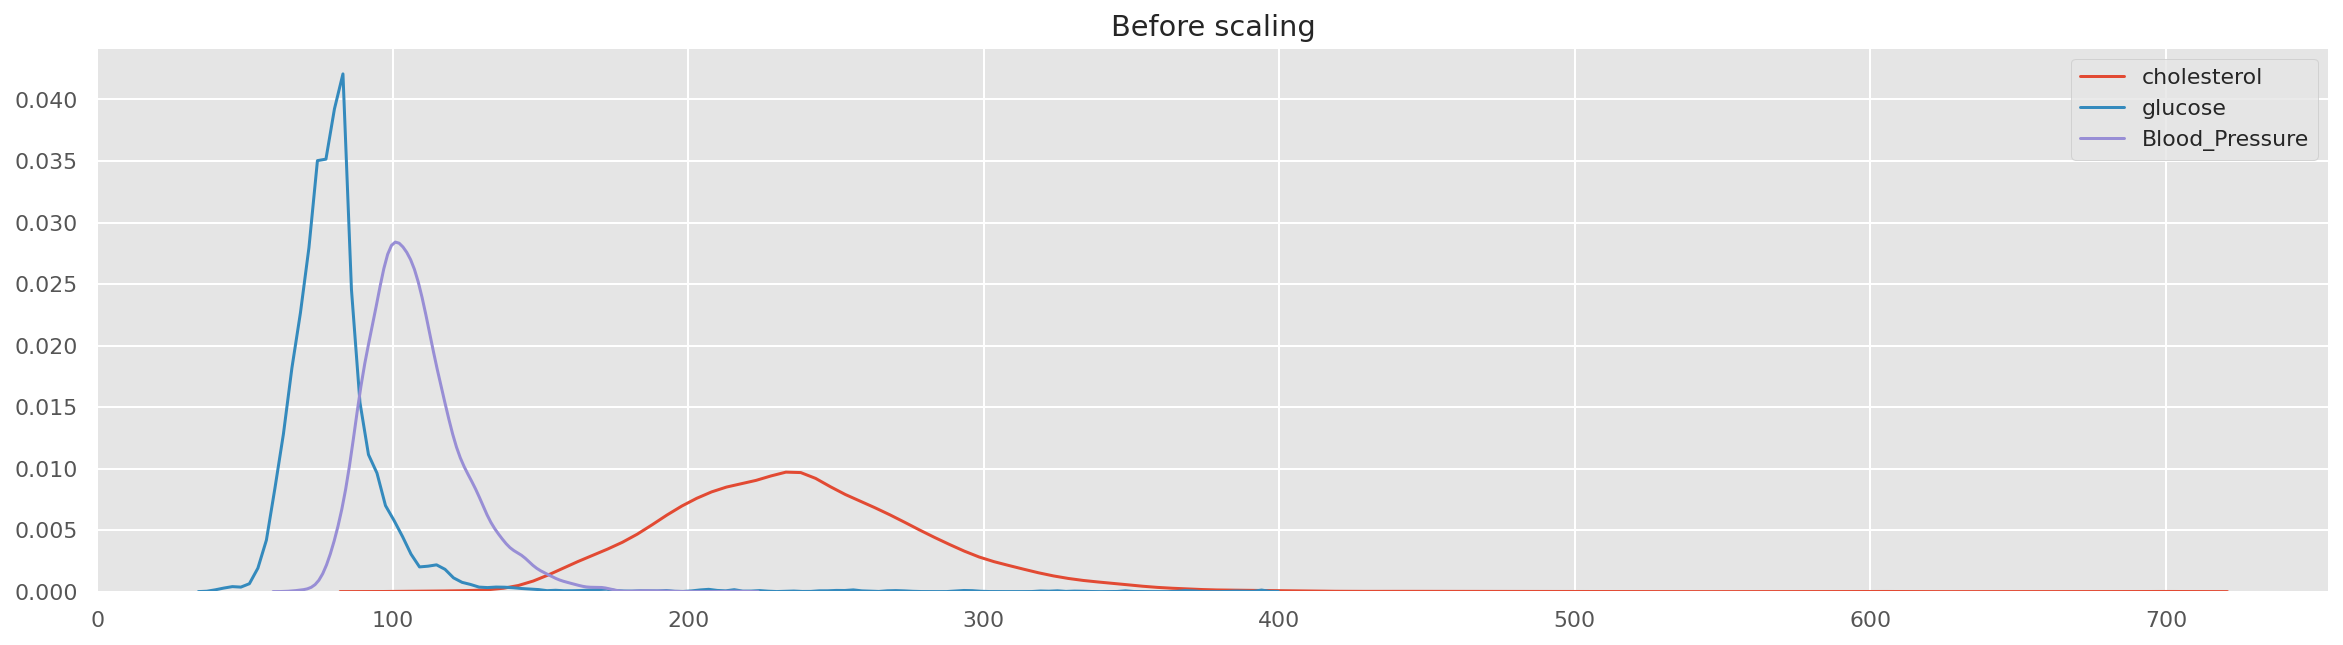

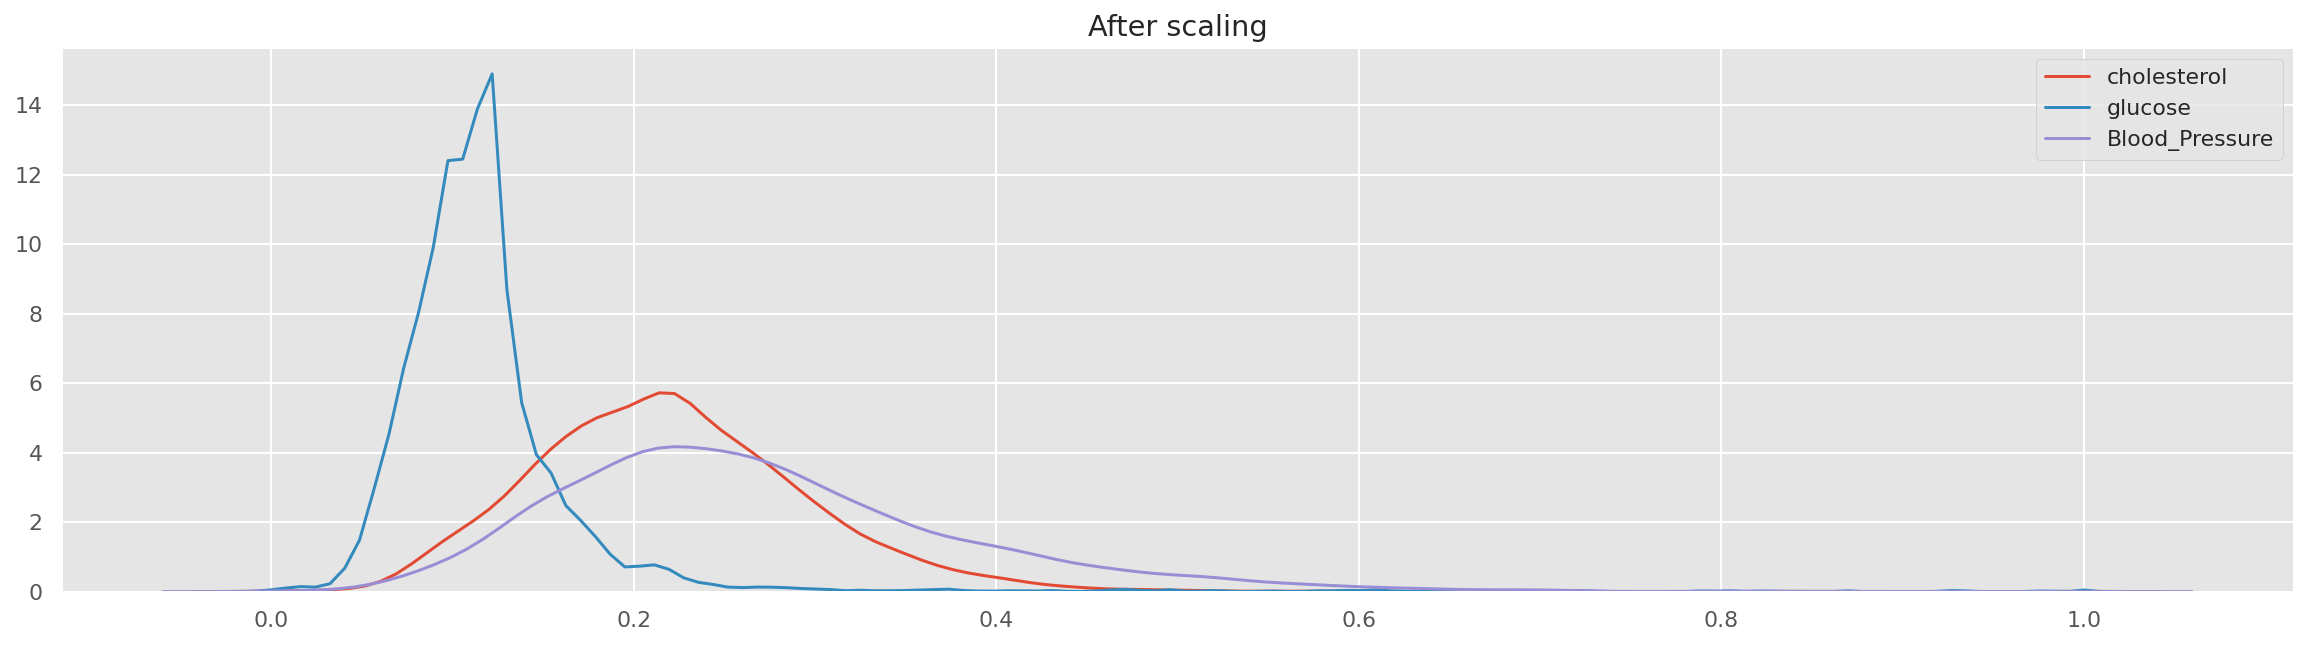

In [119]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Before scaling')
sns.kdeplot(x.cholesterol,ax=ax1)
sns.kdeplot(x.glucose,ax=ax1)
sns.kdeplot(x.Blood_Pressure,ax=ax1)


fig, ax2 = plt.subplots(figsize=(20,5))
ax2.set_title('After scaling')
sns.kdeplot(scaled_df.cholesterol,ax=ax2)
sns.kdeplot(scaled_df.glucose,ax=ax2)
sns.kdeplot(scaled_df.Blood_Pressure,ax=ax2)


In [120]:

# data standardization with sklearn

'''
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_stand = x.copy()

# numerical features
num_cols = ['Gender','age','education','currentSmoker','cigsPerDay','Blood_Pressure_Medication','stroke','hypertension','diabetes','cholesterol','BMI','heartRate','glucose','TenYearCHD','Blood_Pressure',]

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(x_stand[[i]])
    
    # transform the training data column
    x_stand[i] = scale.transform(x_stand[[i]])

x_stand
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# copy of datasets\nx_stand = x.copy()\n\n# numerical features\nnum_cols = ['Gender','age','education','currentSmoker','cigsPerDay','Blood_Pressure_Medication','stroke','hypertension','diabetes','cholesterol','BMI','heartRate','glucose','TenYearCHD','Blood_Pressure',]\n\n# apply standardization on numerical features\nfor i in num_cols:\n    # fit on training data column\n    scale = StandardScaler().fit(x_stand[[i]])\n    \n    # transform the training data column\n    x_stand[i] = scale.transform(x_stand[[i]])\n\nx_stand\n"

### Splitting training and testing data for modelling

In [121]:
import sklearn
from sklearn.model_selection import train_test_split

# from sklearn.cross_validation import train_test_split

X = scaled_df.iloc[:,:-1].values # feature matrix
# Y = scaled_df.iloc[:14].values
Y = scaled_df.iloc[:,-1].values # dependet target variable

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=5)

In [122]:
X_train.shape

(2966, 14)

In [123]:
Y_train.shape

(2966,)

###**Modelling using Logistic Regression**

Logistic regression, as a type of regression analysis in statistics, has been emloyed to predict the outcome of categorical dependent variable from a set of predictor or independet variables. As is always the case in logistic regression, the dependent variable is binary (Nominal).

Logistic regression has been used for prediction as well as calculating the probability of success; ten year risk of coronary heart disease (TenYearCHD).

In [124]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(scaled_df)
df_constant.head()

const  Gender       age  ...   glucose  Blood_Pressure  TenYearCHD
0    1.0     1.0  0.184211  ...  0.104520        0.134583         0.0
1    1.0     0.0  0.368421  ...  0.101695        0.223169         0.0
2    1.0     1.0  0.421053  ...  0.084746        0.241908         0.0
3    1.0     0.0  0.763158  ...  0.177966        0.369676         1.0
4    1.0     0.0  0.368421  ...  0.127119        0.264055         0.0

[5 rows x 16 columns]

In [125]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq,scaled_df)
cols = df_constant.columns[:-1]
model = sm.Logit(scaled_df.TenYearCHD,df_constant[cols])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.379108
         Iterations 7


In [126]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4223
Method:                           MLE   Df Model:                           14
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.1103
Time:                        13:14:02   Log-Likelihood:                -1606.7
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 2.994e-76
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.7388      0.289    -16.385      0.000      -5.306      -4.172
Gender                        0.4774      0.099      4.815      0.000       0.283       0.672
age                           2.4815      0.228     10.865      0.000       2.034       2.929
education                    -0.0622      0.138     -0.450      0.653      -0.333       0.209
currentSmoker                 0.0176      0.144      0.122      0.903      -0.265       0.300
cigsPerDay                    1.4960      0.400      3.742      0.000       0.713       2.279
Blood_Pressure_Medication     0.2679      0.219      1.224      0.221      -0.161       0.697
stroke                        0.9493      0.441      2.154      0.031       0.086       1.813
hypertension                  0.2442      0.128      1.908      0.056      -0.007       0.495
diabetes                      0.2130      0.294      0.725      0.468      -0.363       0.789
cholesterol                   1.1046      0.604      1.829      0.067      -0.079       2.288
BMI                           0.0162      0.483      0.034      0.973      -0.930       0.962
heartRate                    -0.1601      0.385     -0.416      0.677      -0.914       0.594
glucose                       2.4283      0.758      3.202      0.001       0.942       3.915
Blood_Pressure                2.4198      0.553      4.376      0.000       1.336       3.504
=============================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. 

Backward elimination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

**Feature Selection**

Backward elimination (P-value approach)

In [127]:
'''
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)
'''


'\ndef back_feature_elem (data_frame,dep_var,col_list):\n    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest\n    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""\n\n    while len(col_list)>0 :\n        model=sm.Logit(dep_var,data_frame[col_list])\n        result=model.fit(disp=0)\n        largest_pvalue=round(result.pvalues,3).nlargest(1)\n        if largest_pvalue[0]<(0.05):\n            return result\n            break\n        else:\n            col_list=col_list.drop(largest_pvalue.index)\n\nresult=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)\n'

In [128]:
# result.summary()

#### Interpreting results: 
Odds Ratio, Confidence Intervals and Pvalues

In [129]:
p = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = p

pv = round(result.pvalues,3)
conf['pvalue'] = pv
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                           CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                          0.004963       0.015422    0.008749   0.000
Gender                         1.327220       1.957559    1.611866   0.000
age                            7.643751      18.711958   11.959496   0.000
education                      0.716756       1.232032    0.939716   0.653
currentSmoker                  0.767425       1.349657    1.017724   0.903
cigsPerDay                     2.039112       9.771735    4.463817   0.000
Blood_Pressure_Medication      0.851175       2.007486    1.307180   0.221
stroke                         1.089407       6.129115    2.584009   0.031
hypertension                   0.993350       1.640491    1.276551   0.056
diabetes                       0.695908       2.200214    1.237395   0.468
cholesterol                    0.924249       9.854972    3.018021   0.067
BMI                            0.394669       2.617200    1.016331   0.973
heartRate                

  - This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (Gender = 1)over that of females (Gender = 0) is exp(0.4774) = 1.611866.

### Model Evaluation

**Model accuracy**

In [130]:
from sklearn.linear_model import LogisticRegression

# creating an instance of a logistic regression model
logreg = LogisticRegression()

# fiiting the model onto the train data
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
# making predictions of the test data
y_pred = logreg.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [132]:
sklearn.metrics.accuracy_score(Y_test,y_pred)

0.845125786163522

 - 
Accuracy of the model is 0.845125786163522.

**Confusion matrix**

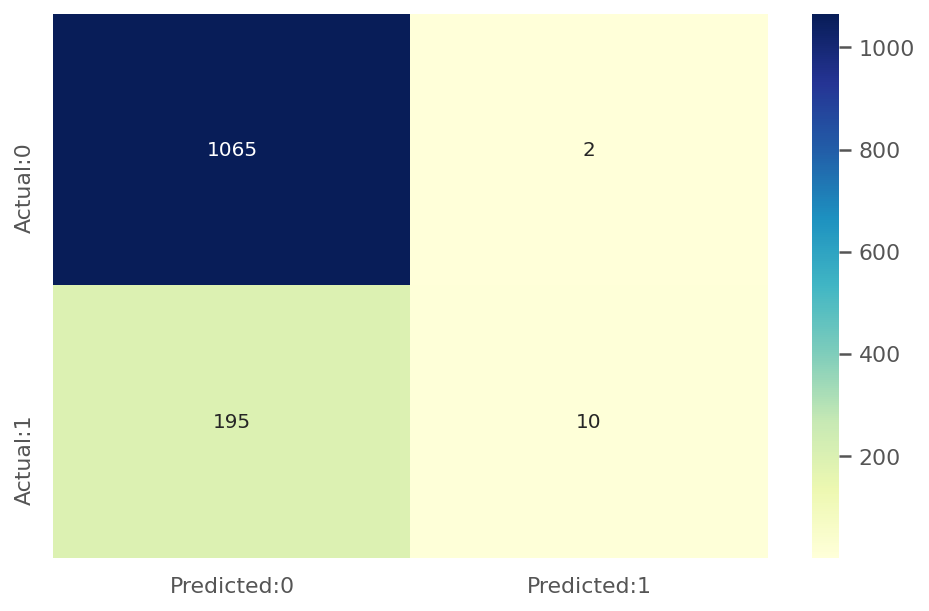

In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

The confusion matrix shows 1063+4 = 1067 correct predictions, and 193+12 = 205 incorrect predictions/Type II errors (False Negatives). 

In [134]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

**Model Evaluation - Statistics**

In [135]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Misclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP)',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative Predictive value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative Likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity )


The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.845125786163522 

 The Misclassification = 1-Accuracy =  0.15487421383647804 

 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.04878048780487805 

 Specificity or True Negative Rate = TN/(TN+FP) 0.9981255857544518 

 Positive Predictive value = TP/(TP+FP) =  0.8333333333333334 

 Negative Predictive value = TN/(TN+FN) =  0.8452380952380952 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  26.02439024390281 

 Negative Likelihood Ratio = (1-Sensitivity)/Specificity =  0.953005839917554


The logistic regression model is highly specific that it is sensitive. The negative values are predicted more accurately that the positives.


*Predicted probabilities of 0 (No Coronary Heart Disease) and 1 (Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5*

In [136]:
y_pred_prob = logreg.predict_log_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob,columns=['No Heart Disease (0)','Heart Disease (1)'])

y_pred_prob_df.head()

No Heart Disease (0)  Heart Disease (1)
0             -0.323791          -1.285187
1             -0.199293          -1.710970
2             -0.052170          -2.979219
3             -0.092587          -2.425543
4             -0.216284          -1.637358

**Lowering the threshold**

For the reason that the model is prediicting Heart disease, too many type II errors is not advisable. 

A False Negative (ignoring the probability of disease when there actually is one) is more danfgerous than a False Positive in this case.

To that effect, in order to increase the sensitivity, the threshold is lowered. 

In [137]:
from sklearn.preprocessing import binarize

for i in range(1,5):
  cm2 = 0
  y_pred_prob_yes = logreg.predict_log_proba(X_test)
  
  y_pred2 = binarize(y_pred_prob_yes,i/10)[:,1]
  cm2 = confusion_matrix(Y_test,y_pred2)

  print('With ',i/10,' threshold the Confusion Matrix is ','\n',cm2,'\n',
        'with ',cm2[0,0]+cm2[1,1],' correct predictions and ',cm2[1,0],
        ' Type II errors (False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),
        'Specitifity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n' )
  

With  0.1  threshold the Confusion Matrix is  
 [[1067    0]
 [ 205    0]] 
 with  1067  correct predictions and  205  Type II errors (False Negatives) 

 Sensitivity:  0.0 Specitifity:  1.0 



With  0.2  threshold the Confusion Matrix is  
 [[1067    0]
 [ 205    0]] 
 with  1067  correct predictions and  205  Type II errors (False Negatives) 

 Sensitivity:  0.0 Specitifity:  1.0 



With  0.3  threshold the Confusion Matrix is  
 [[1067    0]
 [ 205    0]] 
 with  1067  correct predictions and  205  Type II errors (False Negatives) 

 Sensitivity:  0.0 Specitifity:  1.0 



With  0.4  threshold the Confusion Matrix is  
 [[1067    0]
 [ 205    0]] 
 with  1067  correct predictions and  205  Type II errors (False Negatives) 

 Sensitivity:  0.0 Specitifity:  1.0 





### Model performance
**ROC Curce**

The ROC curve helps in deciding the best threshold value. it is generated by plotting TP rate(y-axis) against FP rate(x-axis).
- It will always end at (1,1) while the threshold point being at 0.
- It helps in visuslising the performance of a classification model, and showing the model efficiency by by detecting True Positives(recall).
- Based on the **assumption** of a lower classiffication threshold, the logistic rregression model classifies more items as positive. 
- The threshold based evaluation metrics (precision recall curve) tells the optimal threshold to select.

**Area under Curve(AUC)**

- gives the rate of successful classification bythe  logistic regression  model.

The higher the erea, the greater the disparity between true and false positives, and the stronger the model is in classifying members of the dataset. 

Closer to 1 -> better

**If high threshold**,
- High specificity
- Low sensitivity

**If low threshold**,
- Low specificity
- High sensitivity


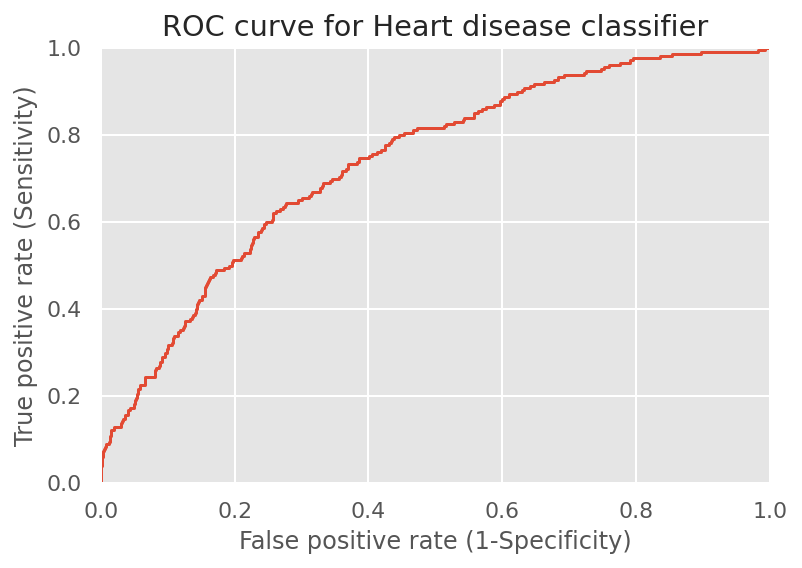

In [138]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [139]:
sklearn.metrics.roc_auc_score(Y_test,y_pred_prob_yes[:,1])

0.7366630854687178

An area of 0.5 corresponds to a model that performs no better than random classification, and a good classifier stays as far away from that as possible.

An area of 1 is ideal. The closer the AUC to 1 the better.

This model has an AUC of 0.7397947287814022, approaching 1. As such, the model is stronger and has a good performance. 
